In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

In [3]:
plt.style.use('seaborn-bright')

In [4]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Reduced_Socio_features_with_clusters.csv")

In [5]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

In [6]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 86 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   event_source.hash                     3000 non-null   object 
 1   ACCOUNT_NUM.hash                      3000 non-null   object 
 2   CUSTOMER_REF.hash                     3000 non-null   object 
 3   ONNET_OUTGOING_Categorical            3000 non-null   object 
 4   ONNET_OUTGOING_Scaled                 3000 non-null   float64
 5   ONNET_OUTGOING_Outlier                3000 non-null   object 
 6   ONNET_INCOMING_Categorical            2890 non-null   object 
 7   ONNET_INCOMING_Scaled                 2890 non-null   float64
 8   ONNET_INCOMING_Outlier                2890 non-null   object 
 9   OFFNET_OUTGOING_Categorical           2886 non-null   object 
 10  OFFNET_OUTGOING_Scaled                2886 non-null   float64
 11  OFFNET_OUTGOING_O

## Filling null values

In [7]:
cat_cols = ["BB_Categorical","PEO_TV_Categorical","IDD_INCOMING_Categorical","IDD_OUTGOING_Categorical",
            "ONNET_OUTGOING_Categorical","OFFNET_OUTGOING_Categorical","ONNET_INCOMING_Categorical",
            "OFFNET_INCOMING_Categorical","IDD_incoming_country","IDD_outgoing_country","IDD_Overall_Categorical",
            "Location_Identifier","GENDER","Voice_VAS_Month_Subscribed","BB_VAS_Month_Subscribed", "VOICE_Categorical",
            "Peo_VAS_Month_Subscribed","Other_VAS_Month_Subscribed","BB_Extra_GB_Purchase_Categorical",
            "Peo_TV_Package","Voice_VAS_Package","BB_VAS_Package","Other_VAS_Package",
            "Having_Insurance","Having_Senior_Citizen","Having_Kids_at_Home","Having_Teenagers_Students",
            "Having_Working_Professionals","Having_Family_Member_Abroad","Tamil_Customer"]

In [8]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [9]:
user_profile["KMOD_3_Cluster"].value_counts()

2    1680
1     897
0     423
Name: KMOD_3_Cluster, dtype: int64

<AxesSubplot:ylabel='KMOD_3_Cluster'>

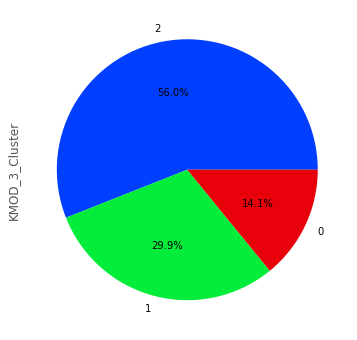

In [10]:
user_profile["KMOD_3_Cluster"].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

# Cluster analysis - Cluster 0

In [11]:
cluster_0 = user_profile[(user_profile["KMOD_3_Cluster"]==0)]

In [12]:
cluster_0.describe()

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
count             423.000000             405.000000              410.000000   
mean                0.099690               0.105857                0.112829   
std                 0.107989               0.112143                0.110824   
min                 0.001202               0.001202                0.001202   
25%                 0.018066               0.018716                0.030808   
50%                 0.055288               0.056834                0.081915   
75%                 0.149836               0.165694                0.154453   
max                 0.468750               0.508242                0.668294   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count              413.000000           190.000000            46.000000   
mean                 0.119044             0.091977             0.080581   
std                  0.116354             0.162927             0.097616   
min                  0.001202             0.002500             0.004808   
25%                  0.028470             0.005833             0.019231   
50%                  0.091134             0.019250             0.038462   
75%                  0.174745             0.097667             0.113782   
max                  0.933894             0.827000             0.423077   

       IDD_outgoing_Cumulative_Revenue  PEO_TV_Scaled   BB_Scaled  \
count                     4.600000e+01     159.000000  122.000000   
mean                      6.919851e+05       0.003931    0.277024   
std                       1.990212e+06       0.026920    0.267735   
min                       1.200000e+03       0.000000    0.005208   
25%                       4.682775e+04       0.000000    0.072917   
50%                       1.611755e+05       0.000000    0.145833   
75%                       4.569000e+05       0.000000    0.498698   
max                       1.206057e+07       0.231250    0.979167   

        BIRTH_YEAR  ...  Peo_Packages_if_Kids  \
count   313.000000  ...                 423.0   
mean   1965.814696  ...                   0.0   
std      13.482569  ...                   0.0   
min    1928.000000  ...                   0.0   
25%    1956.000000  ...                   0.0   
50%    1967.000000  ...                   0.0   
75%    1976.000000  ...                   0.0   
max    1995.000000  ...                   0.0   

       Peo_Packages_if_Teenager_Students  \
count                              423.0   
mean                                 0.0   
std                                  0.0   
min                                  0.0   
25%                                  0.0   
50%                                  0.0   
75%                                  0.0   
max                                  0.0   

       Peo_Package_if_Working_Professionals  VAS_if_Kids  \
count                                 423.0   423.000000   
mean                                    0.0     0.033097   
std                                     0.0     0.168887   
min                                     0.0     0.000000   
25%                                     0.0     0.000000   
50%                                     0.0     0.000000   
75%                                     0.0     0.000000   
max                                     0.0     1.000000   

       VAS_if_Teenager_Students  VAS_if_Working_Professionals  \
count                423.000000                    423.000000   
mean                   0.072340                      0.062766   
std                    0.158834                      0.134032   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.000000                      0.000000   
max                    0.800000                      0.750000   

       IDD_if_Family_Member_Abr

#### Exceptional (Outlier Usage)

<AxesSubplot:>

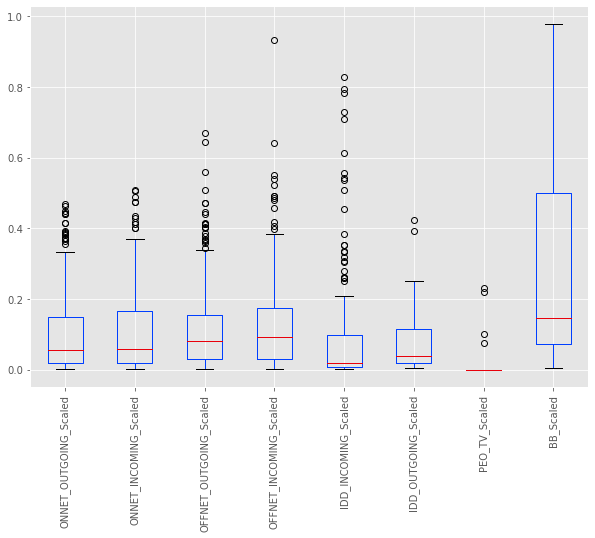

In [13]:
cluster_0.iloc[:,[4,7,10,13,16,20,26,28,62]].boxplot(figsize=(10,7),rot=90)

### Exceptional Users (Outliers) analysis

In [14]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

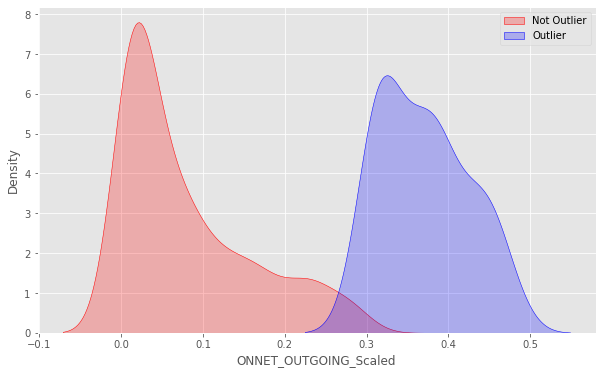

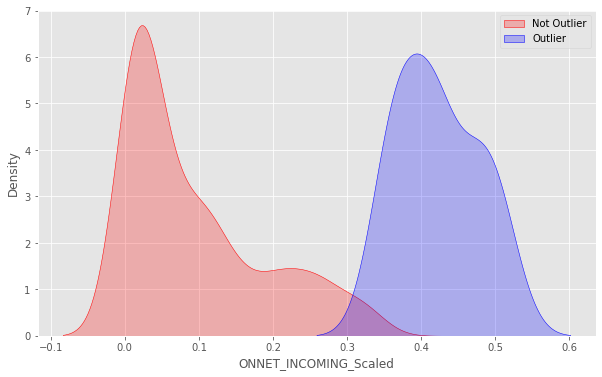

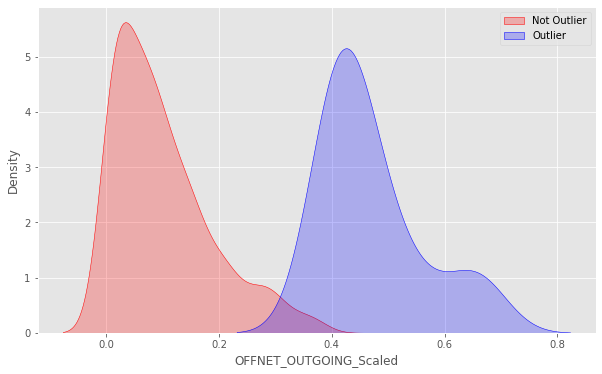

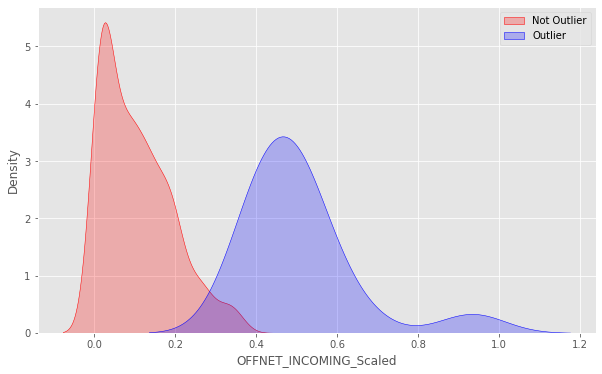

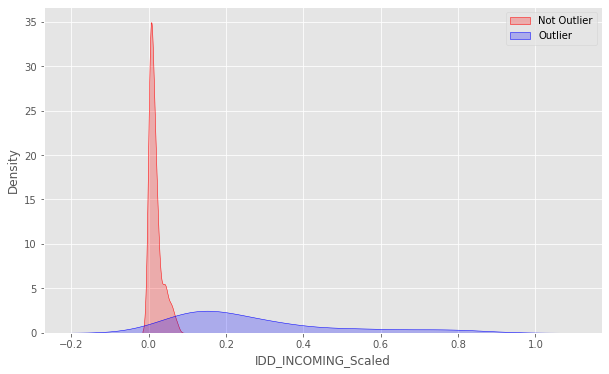

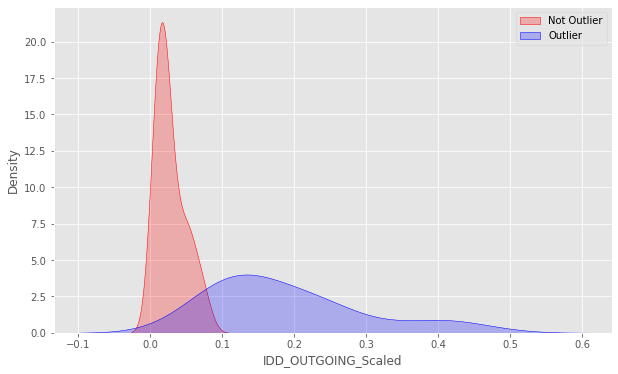

In [15]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_0[scaled_cols[i]][(cluster_0[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_0[scaled_cols[i]][(cluster_0[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [16]:
# Voice Outliers
cluster_0_out = cluster_0[(cluster_0["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_0["ONNET_INCOMING_Outlier"]=="YES") | (cluster_0["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_0["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_0["IDD_OUTGOING_Outlier"]=="YES") | (cluster_0["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

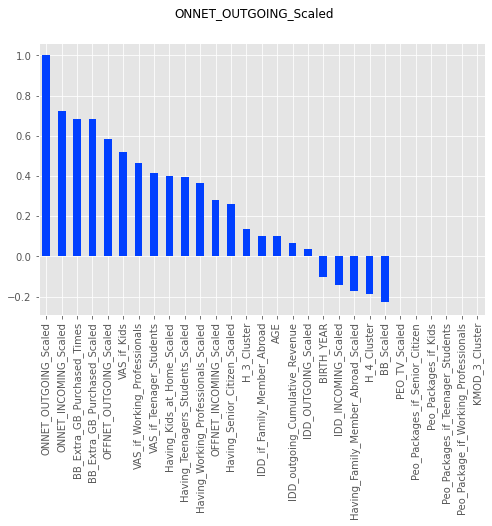

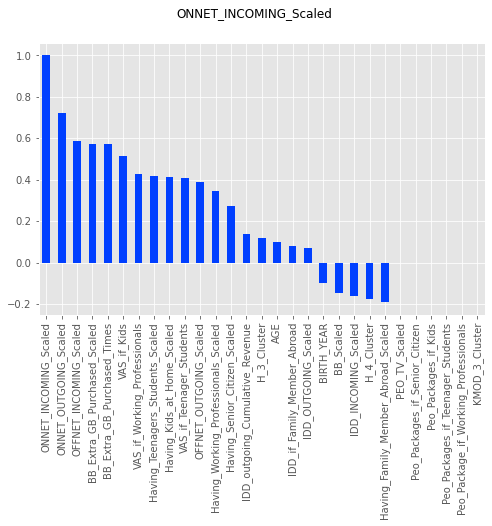

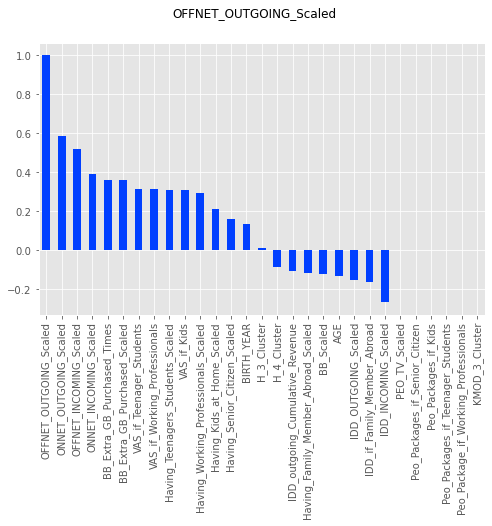

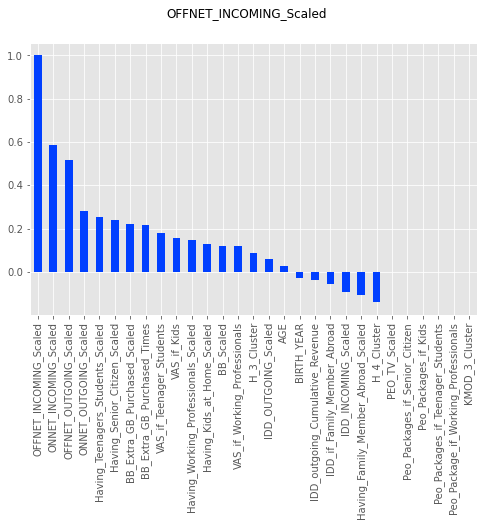

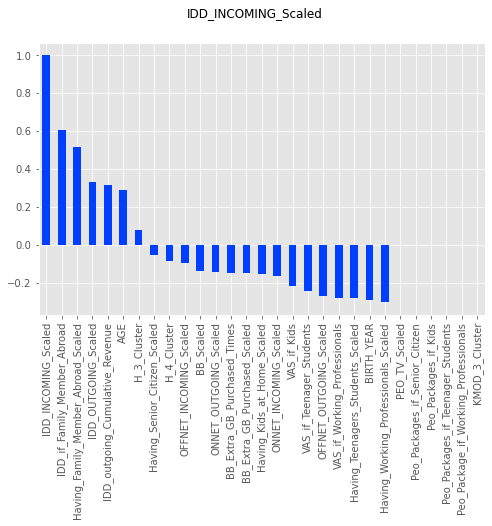

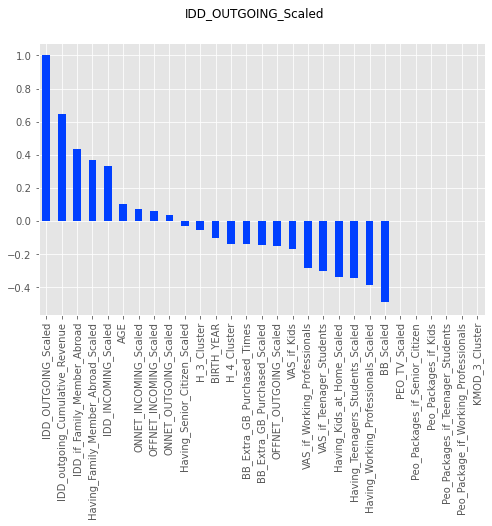

In [17]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_0_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [18]:
cluster_0_out_sub_df = pd.DataFrame([dict(cluster_0["Sub_Type"].value_counts()),dict(cluster_0_out["Sub_Type"].value_counts())])

In [19]:
cluster_0_out_sub_df

DOUBLE_PLAY_BV  SINGLE_PLAY  DOUBLE_PLAY_PV  TRIPLE_PLAY   4G
0             252          157               8            5  1.0
1              71           23               2            1  NaN

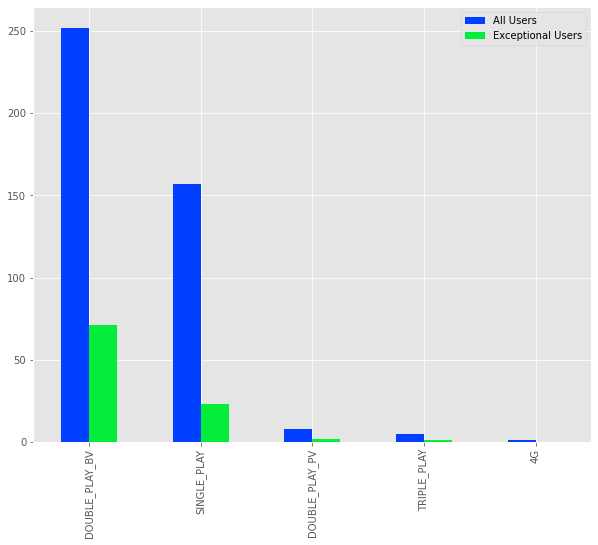

In [20]:
fig, ax = plt.subplots()
cluster_0_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

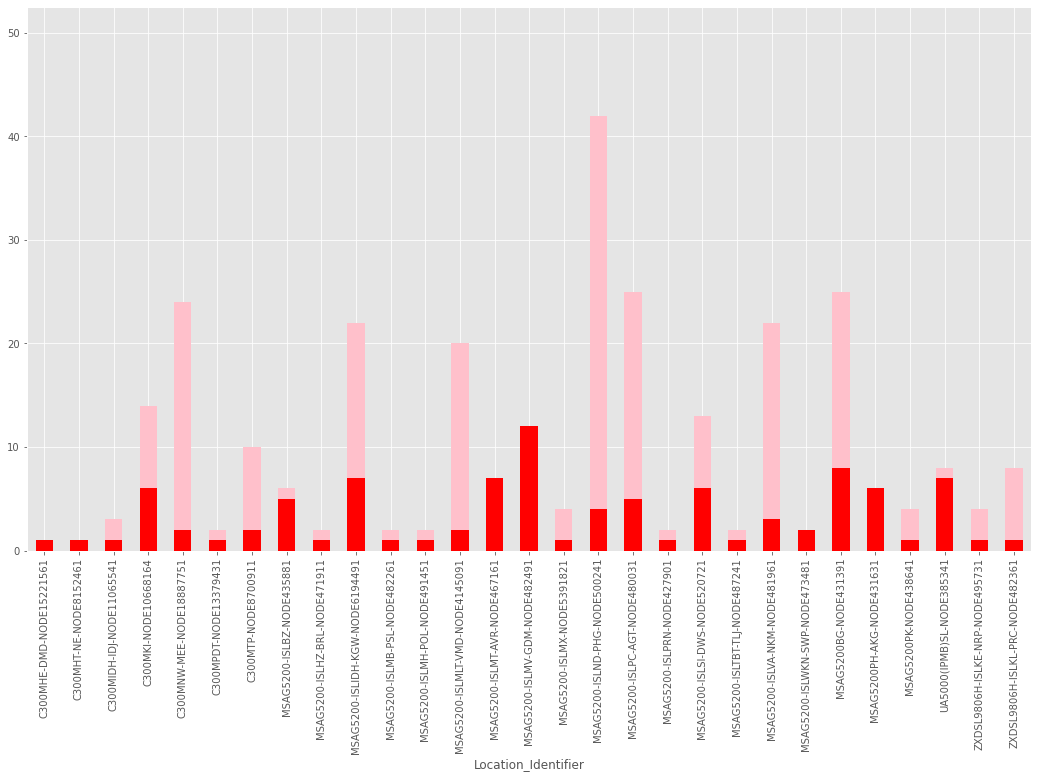

In [21]:
cluster_0_loc = cluster_0.groupby('Location_Identifier').count()["event_source.hash"]
cluster_0_out_loc = cluster_0_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_0_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

#### Skewness and Distribution

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

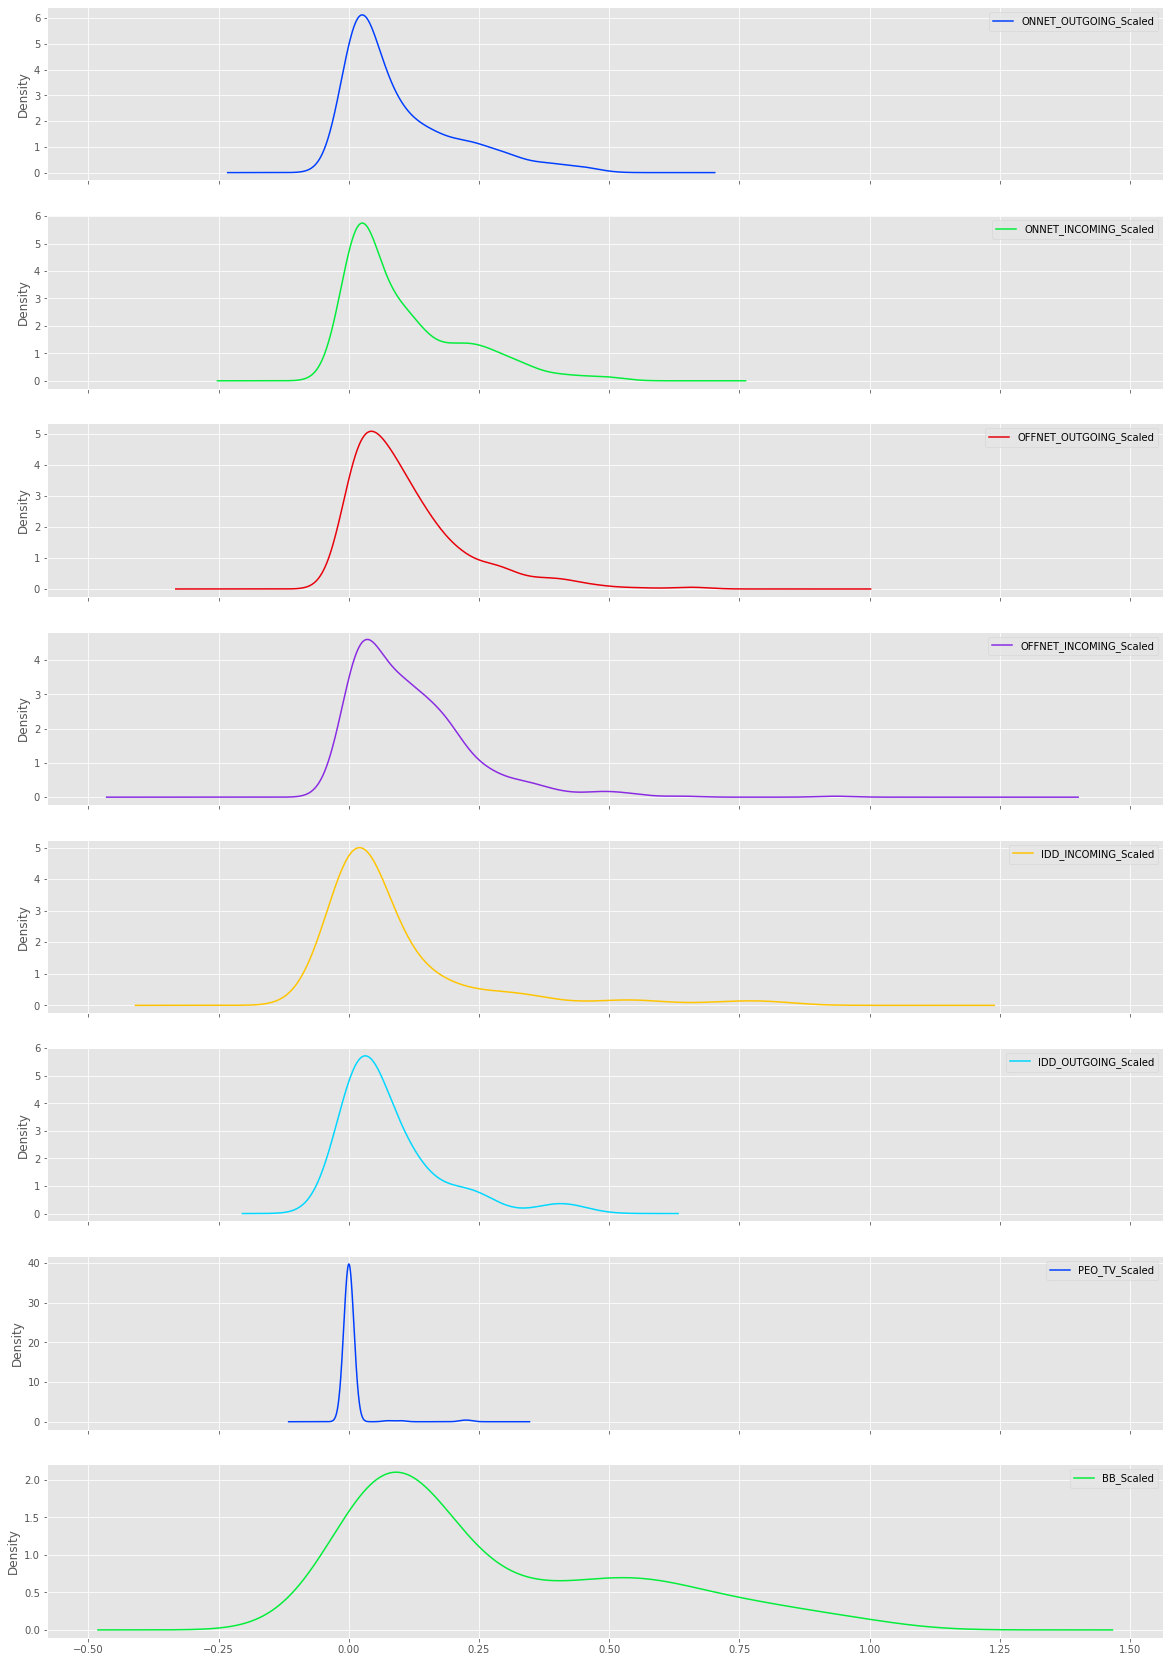

In [22]:
cluster_0.iloc[:,[4,7,10,13,16,20,26,28,62]].plot.kde(figsize=(20,30),subplots=True)

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>],
       [<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Times'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Senior_Citizen_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Kids_at_Home_Scaled'}>],
       [<AxesSubplot:title={'center':'Having_Teenager

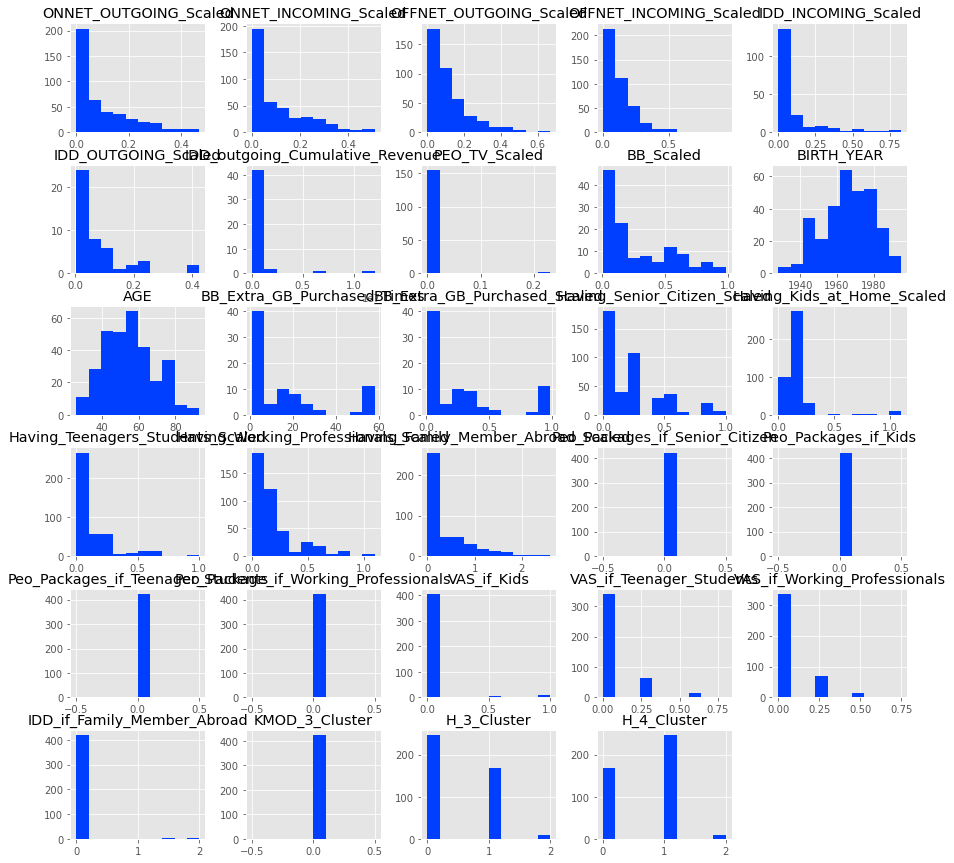

In [23]:
cluster_0.hist(figsize=(15,15))

### Subscription Type and Usage

In [24]:
cluster_0["Sub_Type"].value_counts()

DOUBLE_PLAY_BV    252
SINGLE_PLAY       157
DOUBLE_PLAY_PV      8
TRIPLE_PLAY         5
4G                  1
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

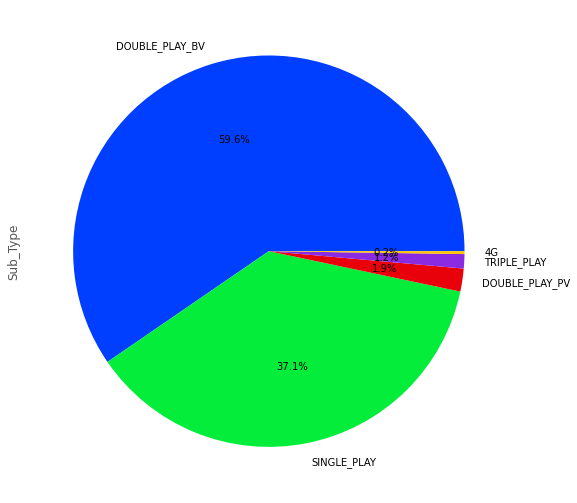

In [25]:
cluster_0["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [26]:
len(cluster_0[(cluster_0["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

417

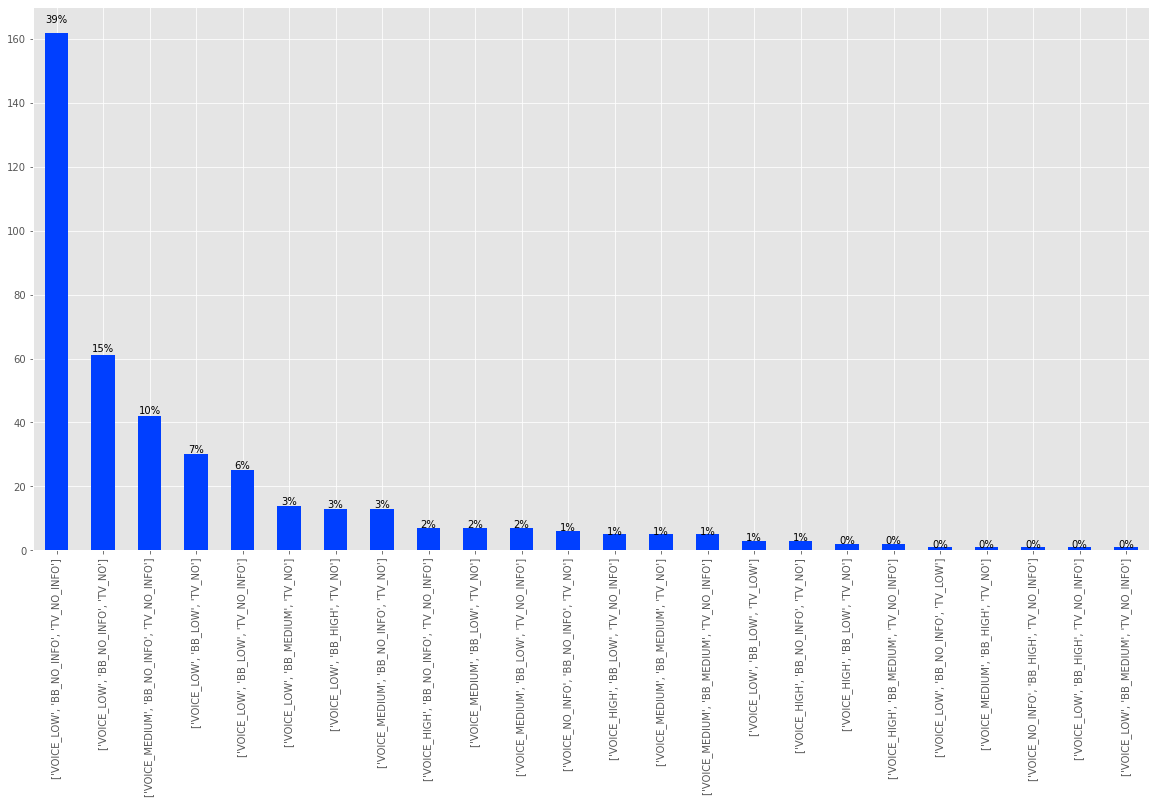

In [27]:
ax =cluster_0[(cluster_0["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [28]:
cluster_0["VOICE_Categorical"].value_counts()

LOW        311
MEDIUM      80
HIGH        19
NO_INFO     13
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

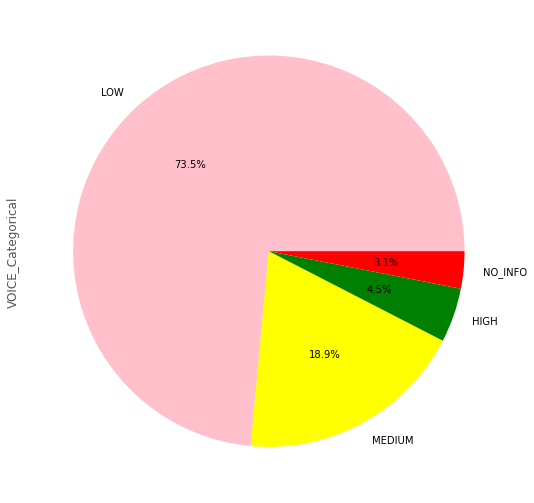

In [29]:
cluster_0["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','green','red'] )

### VOICE VAS Packages

In [30]:
count_dict = dict(cluster_0["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

In [31]:
all_voice_products_dict.pop('V_SLT Voice Service')

382

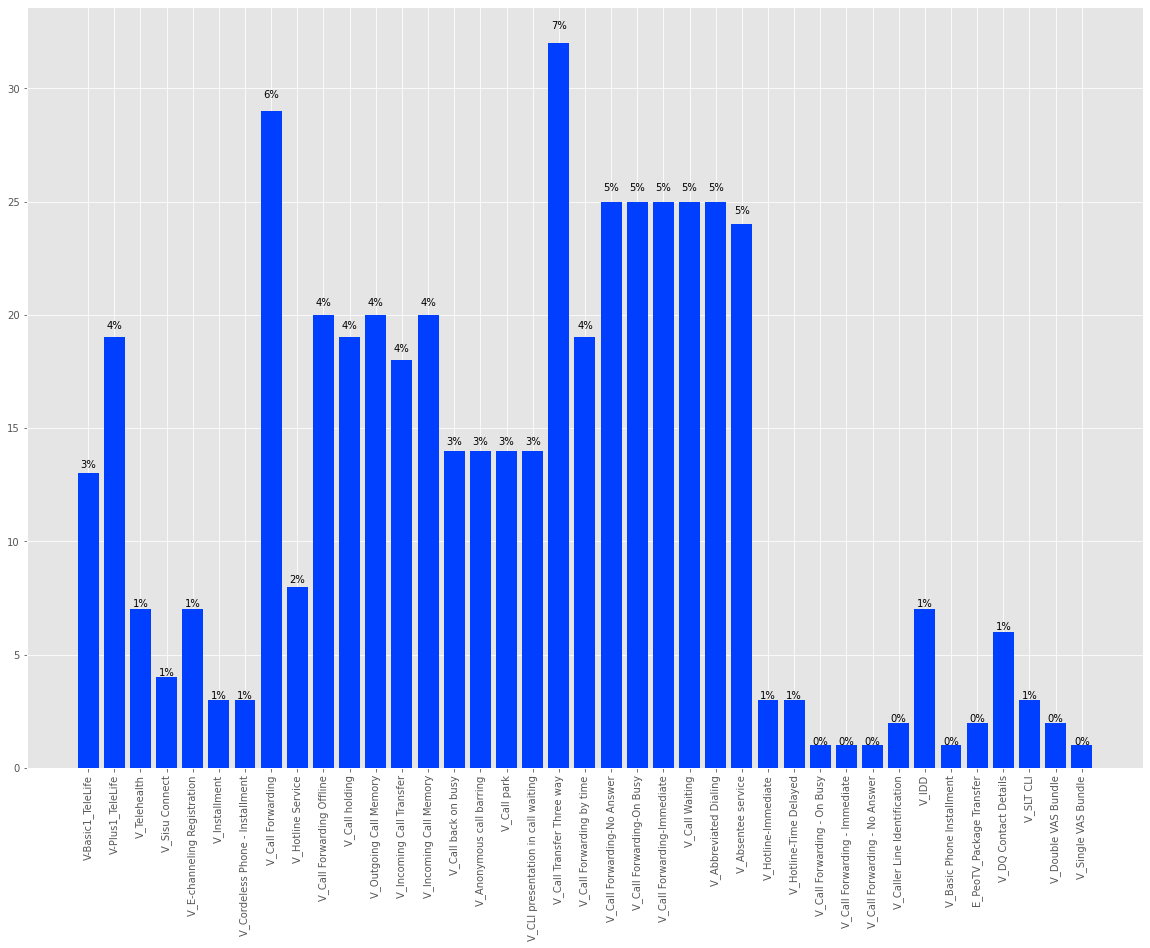

In [32]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [33]:
cluster_0["IDD_Overall_Categorical"].value_counts()

NO_INFO    230
LOW        189
MEDIUM       2
HIGH         2
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

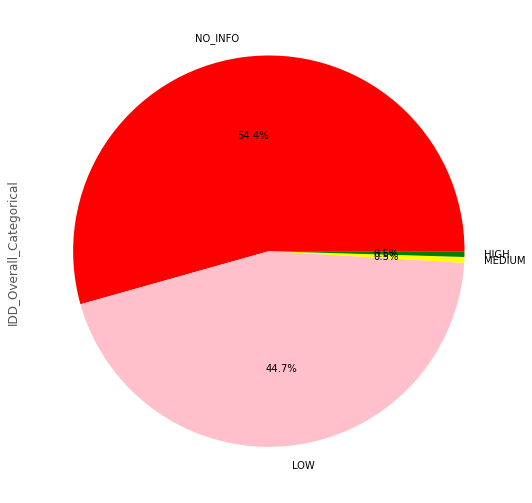

In [34]:
cluster_0["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','pink','yellow','green'] )

#### IDD Calling country analysis

In [35]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [36]:
cluster_0_idd_country_df = cluster_0[["event_source.hash","IDD_incoming_country"]]

In [37]:
cluster_0_idd_country_df["IDD_incoming_country"] = cluster_0_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-37-27ef6e54b7d6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
cluster_0_idd_country_df = cluster_0_idd_country_df.explode("IDD_incoming_country")

<AxesSubplot:>

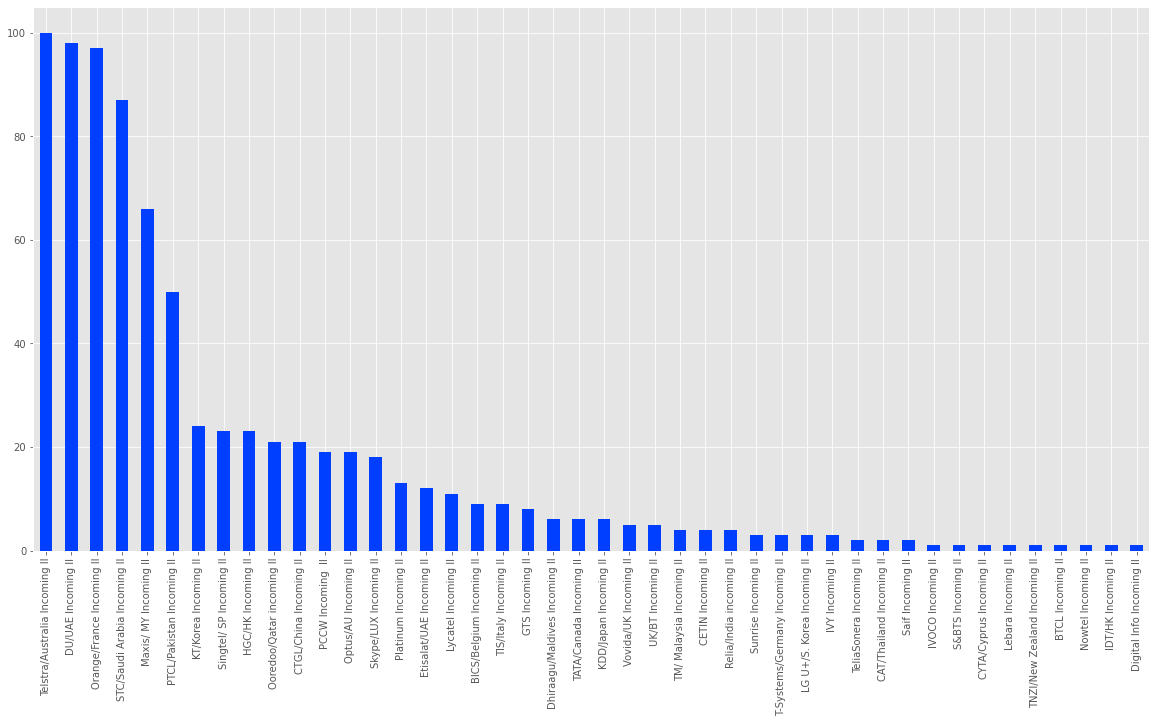

In [39]:
cluster_0_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Outgoing Countries

In [40]:
cluster_0_idd_out_country_df = cluster_0[["event_source.hash","IDD_outgoing_country"]]

In [41]:
cluster_0_idd_out_country_df["IDD_outgoing_country"] = cluster_0_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-41-2f7f361cb0ce>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
cluster_0_idd_out_country_df = cluster_0_idd_out_country_df.explode("IDD_outgoing_country")

In [43]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [44]:
cluster_0_idd_out_country_df["IDD_outgoing_country"] = cluster_0_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

<AxesSubplot:>

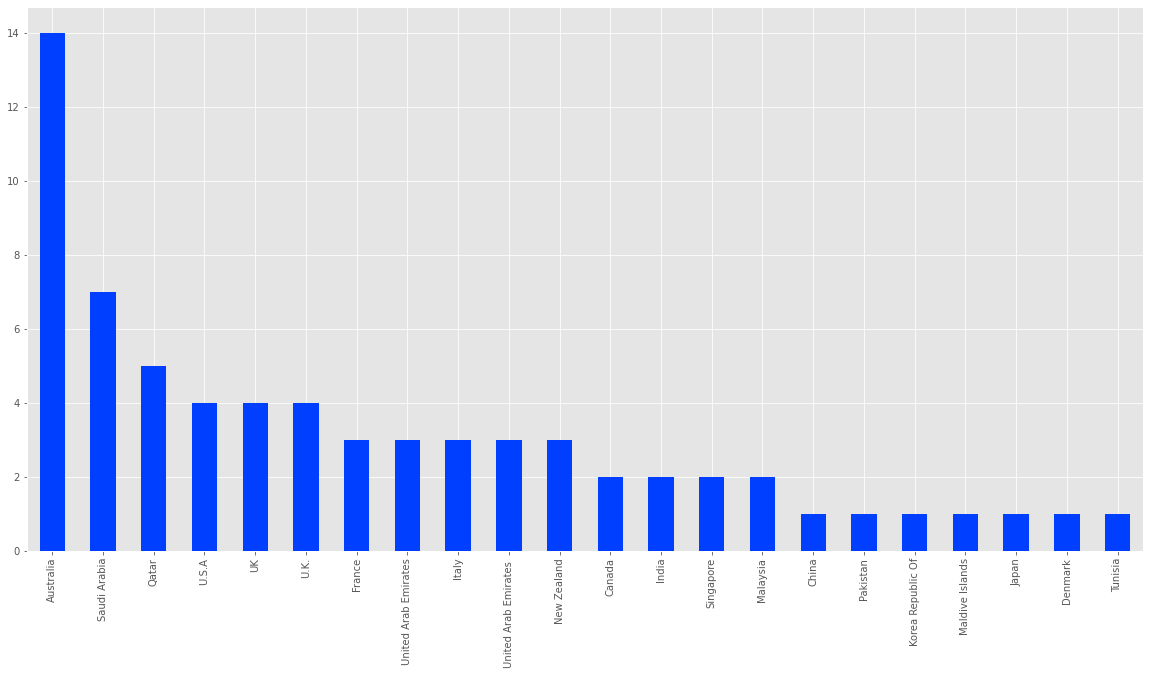

In [45]:
cluster_0_idd_out_country_df["IDD_outgoing_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Rental anlysis

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [46]:
cluster_0["PEO_TV_Categorical"].value_counts()

NO_INFO    264
NO         155
LOW          4
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

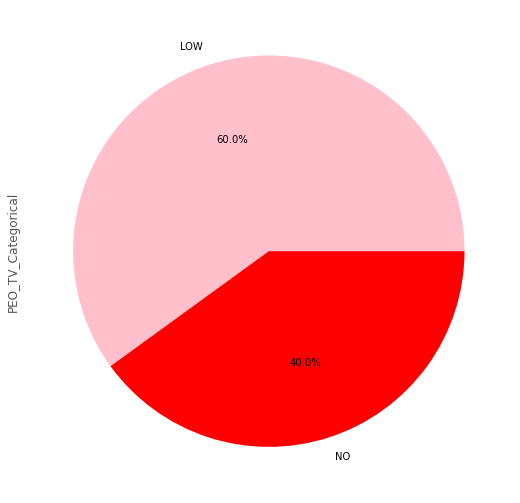

In [47]:
cluster_0_peo = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY")]
cluster_0_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink','red'])

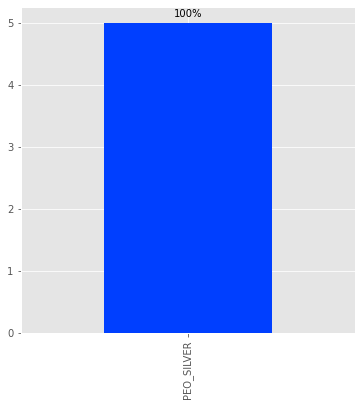

In [48]:
ax =cluster_0_peo[(cluster_0_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(6,6))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### PeoTV Usage among Double Play PV users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

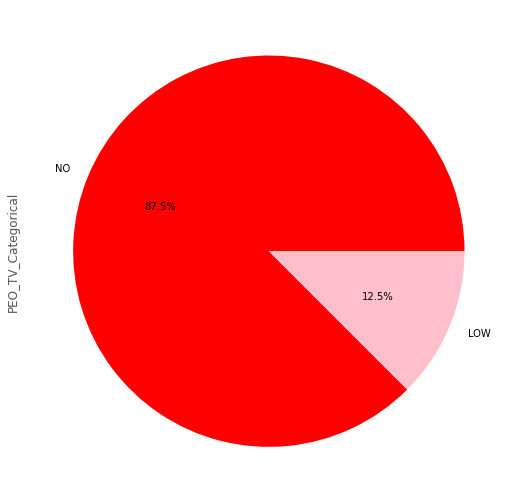

In [49]:
cluster_0_peo_pv = cluster_0[(cluster_0["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_0_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','pink','pink','yellow','green'])

In [50]:
cluster_0_peo_pv["PEO_TV_Categorical"].value_counts()

NO     7
LOW    1
Name: PEO_TV_Categorical, dtype: int64

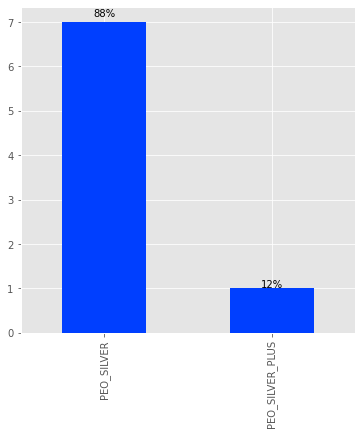

In [51]:
ax =cluster_0_peo_pv[(cluster_0_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(6,6))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [52]:
count_dict = dict(cluster_0["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

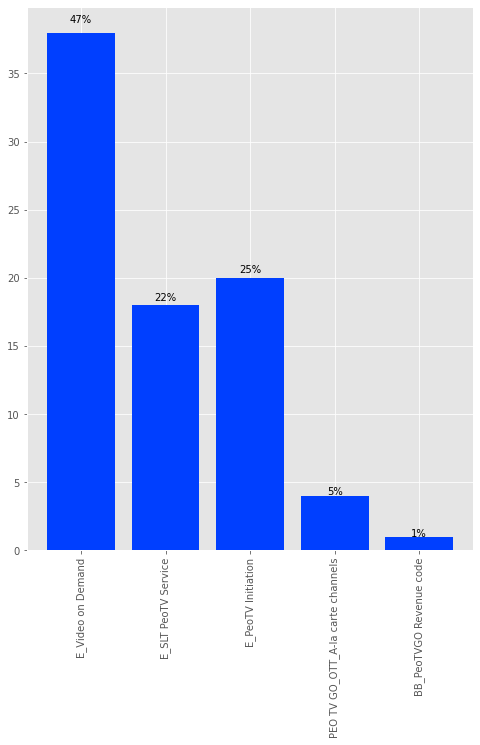

In [53]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [54]:
cluster_0["BB_Categorical"].value_counts()

NO_INFO    301
LOW         79
MEDIUM      27
HIGH        16
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

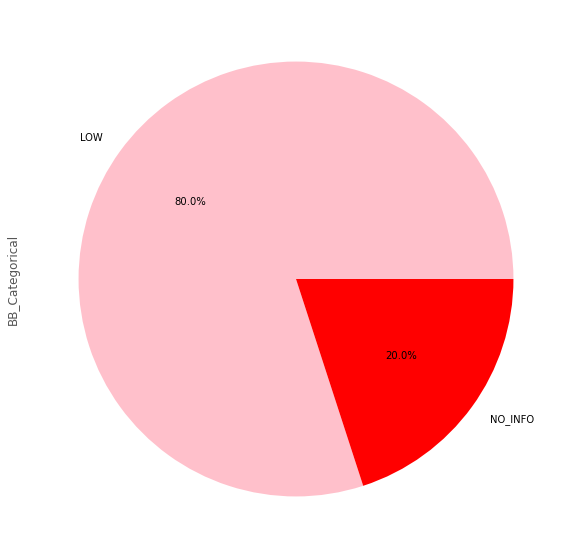

In [55]:
cluster_0_bb = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY")]
cluster_0_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['pink','red','yellow','green'])

#### BB Usage for Double Play BV Customers in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

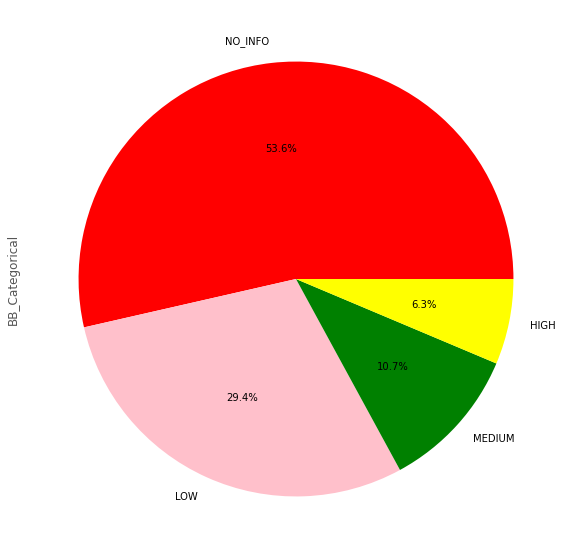

In [56]:
cluster_0_bb_dp = cluster_0[(cluster_0["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_0_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [57]:
count_dict = dict(cluster_0["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

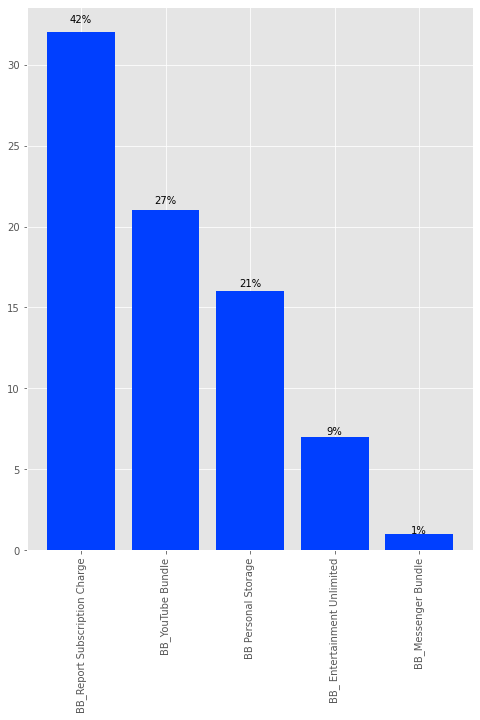

In [58]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [135]:
extra_gb_freq_users = cluster_0[(cluster_0["BB_Extra_GB_Purchased_Scaled"]>0.5)]

In [136]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

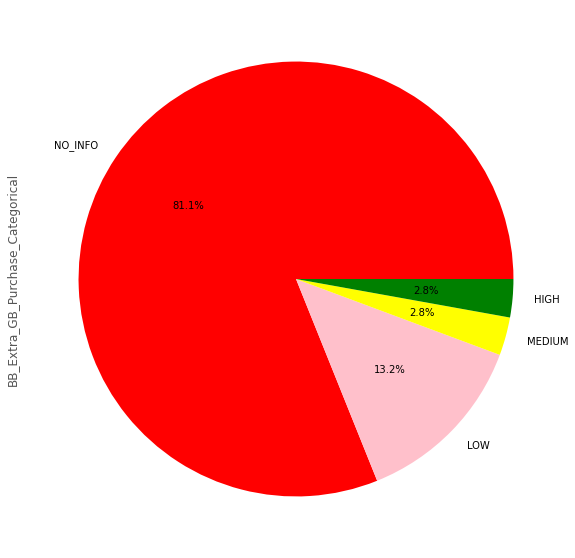

In [137]:
cluster_0["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

[Text(0, 0, '9958e2d5975774299cab39ed392a05f1'),
 Text(1, 0, 'ebd27202064983929d81256450c31b9e'),
 Text(2, 0, '048f304256dc532c9aa79b434ab5ee2e'),
 Text(3, 0, '74ee3d188f159cc1493c791c27a7a135'),
 Text(4, 0, 'c5722f1197db46f96000e28ef6c36da1'),
 Text(5, 0, '87a25834b97075e230f0e7237b6205b7'),
 Text(6, 0, '91d83d11d3d356ad391441fa05bc3b90'),
 Text(7, 0, 'ffb63ff99cf1354dff1da862f379da80'),
 Text(8, 0, '0e7d786a4c50702484cf004a0d1b68a2'),
 Text(9, 0, '672440718a32b776e2f8f0a712f8390e'),
 Text(10, 0, 'e62d17dab22425b9abc747759fb38dbd'),
 Text(11, 0, '4cebd60d20845469364f6af9bf875cdd'),
 Text(12, 0, '31d67691d57f8199e202ad2b2958cd38'),
 Text(13, 0, '1b266fbf846f3eb53f6f0c1f2813bc0a')]

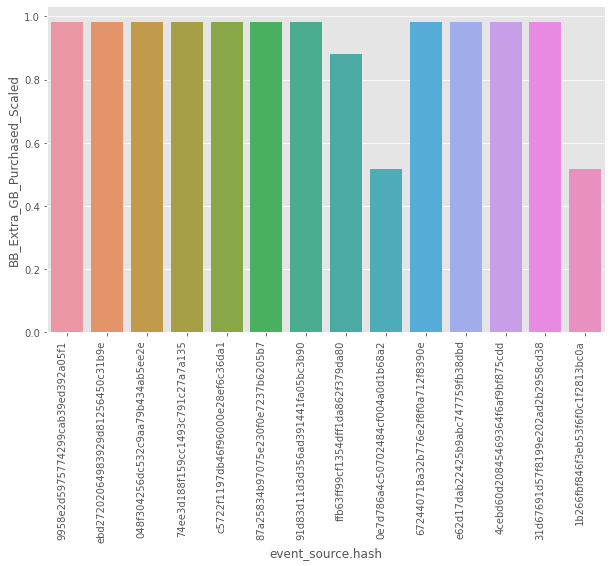

In [138]:
plt.figure(figsize=(10,6))
extra_gb_bar_plot = sns.barplot(data=extra_gb_freq_users,x='event_source.hash', y='BB_Extra_GB_Purchased_Scaled')

extra_gb_bar_plot.set_xticklabels(extra_gb_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Most Extra GB Useed users - By spent amount with Time

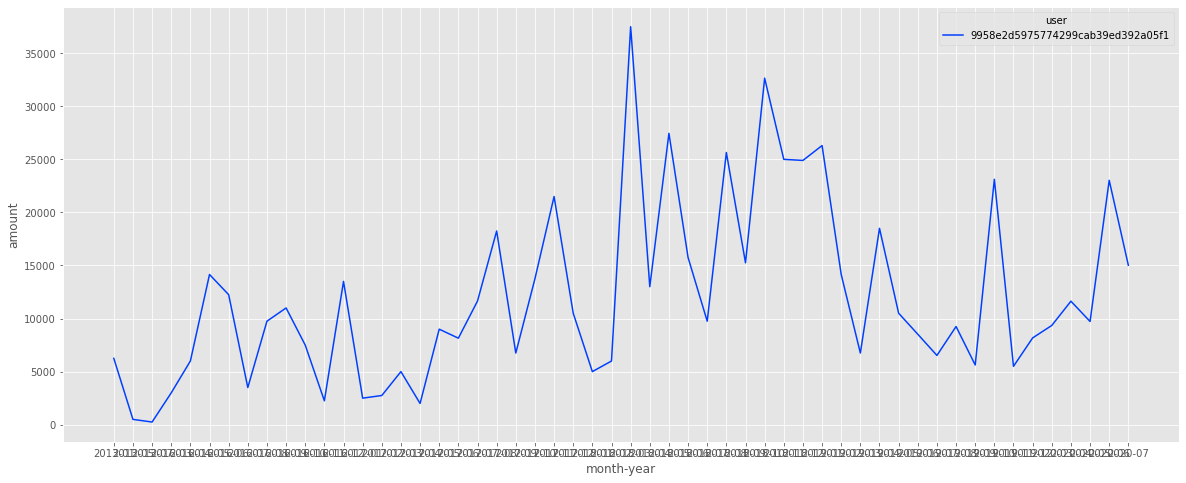

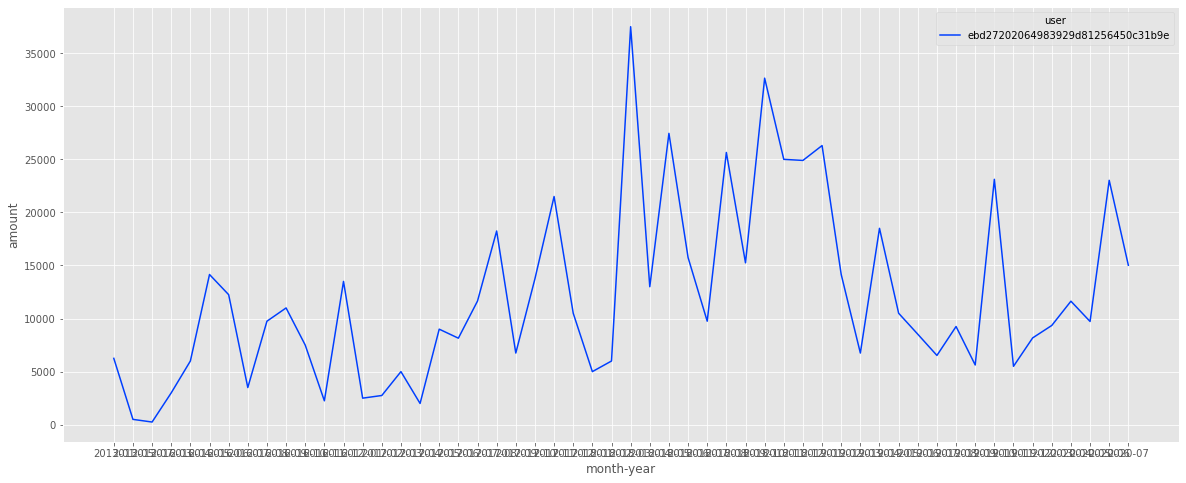

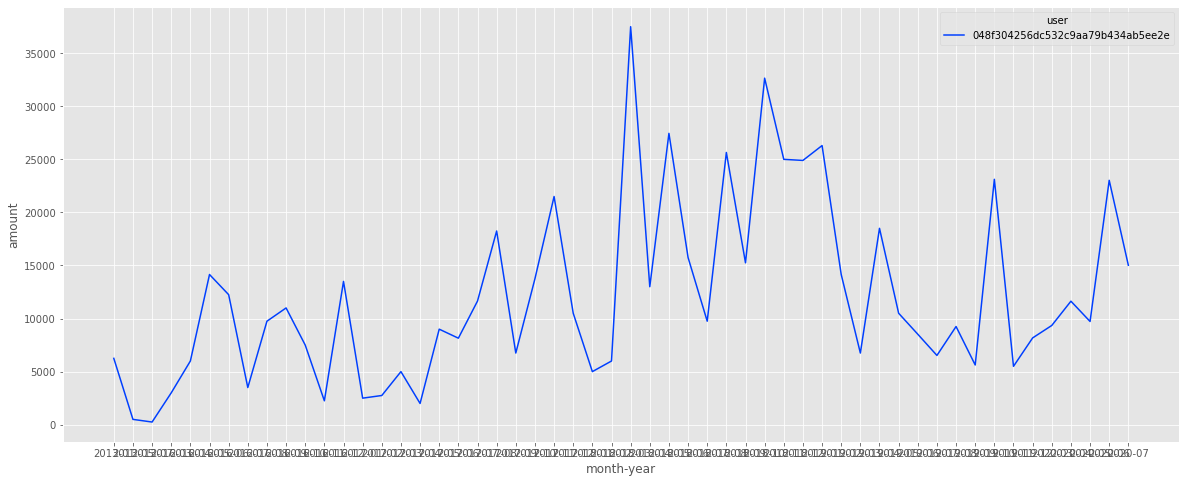

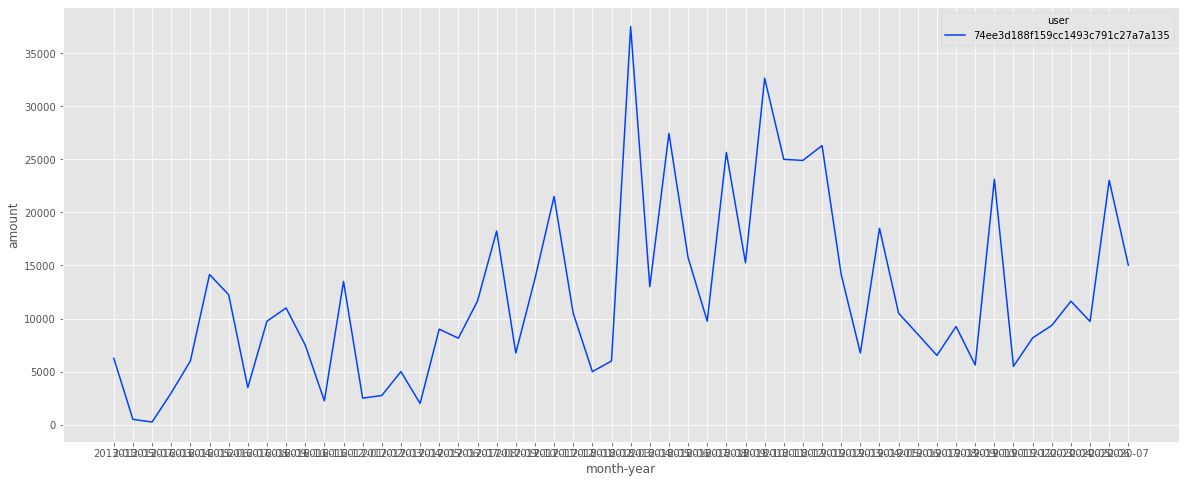

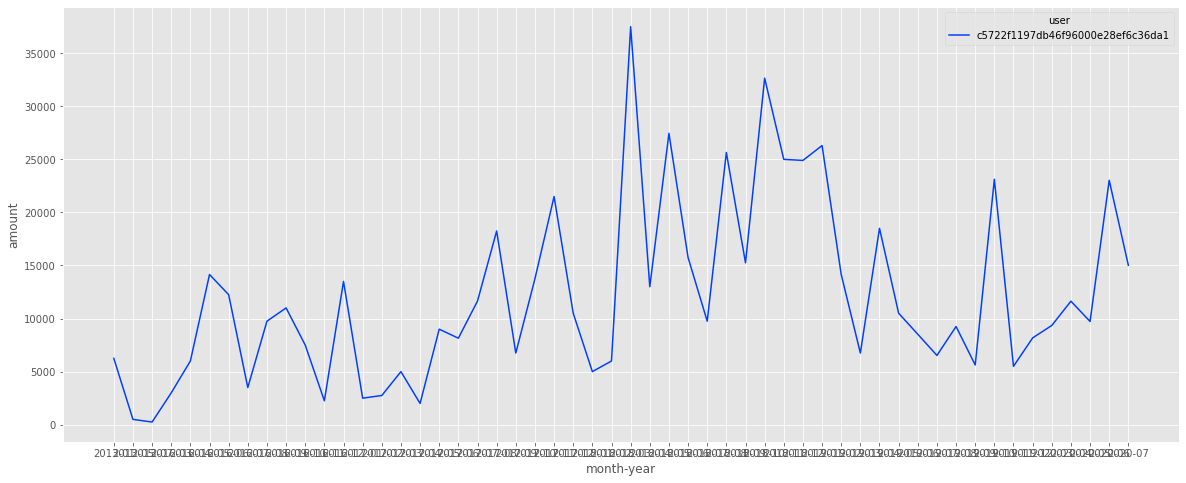

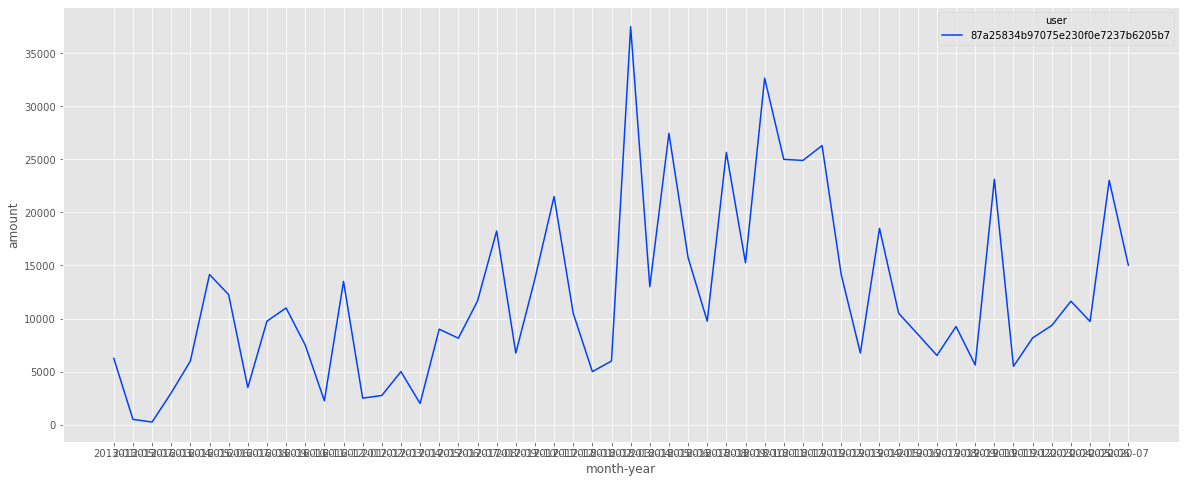

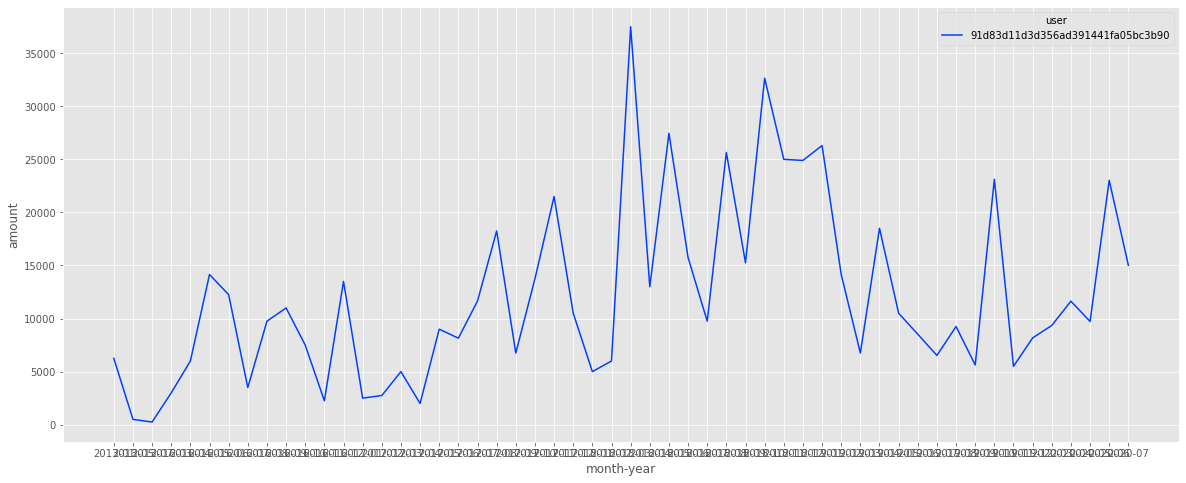

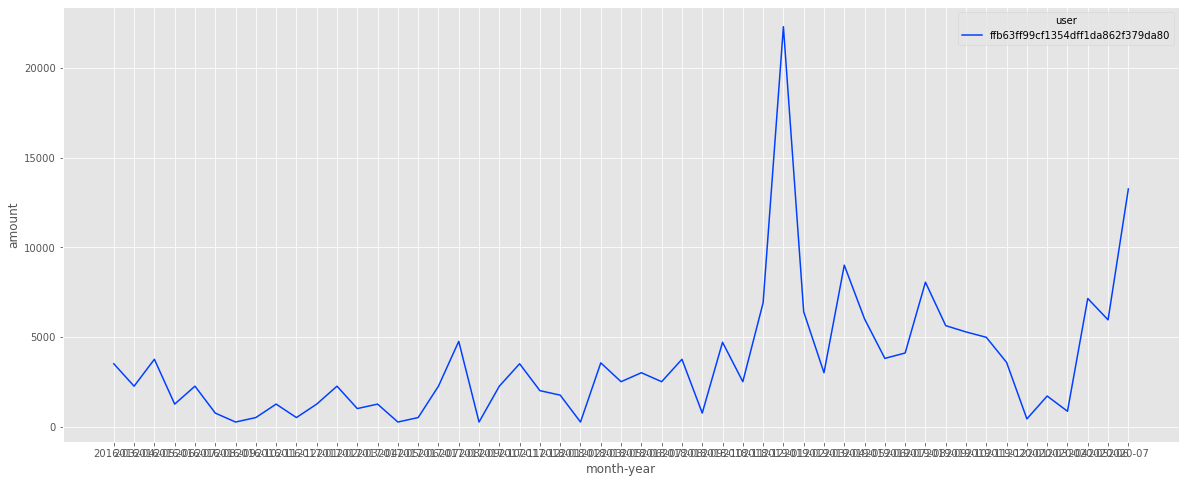

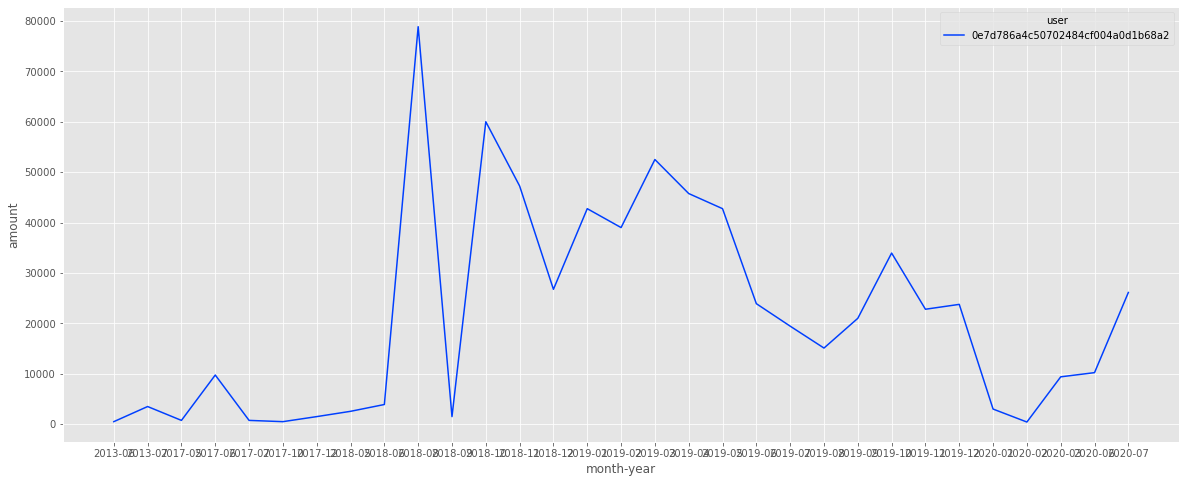

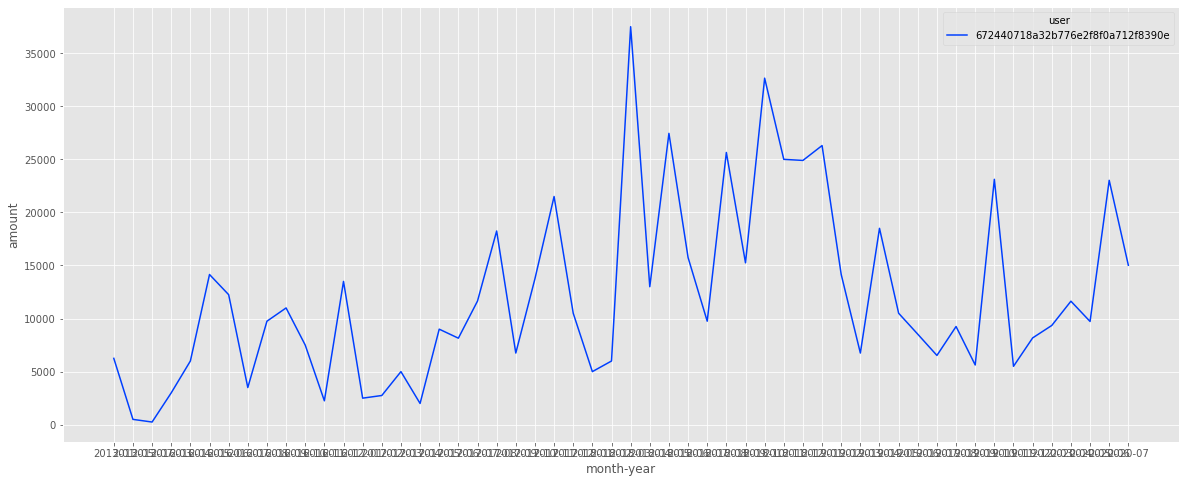

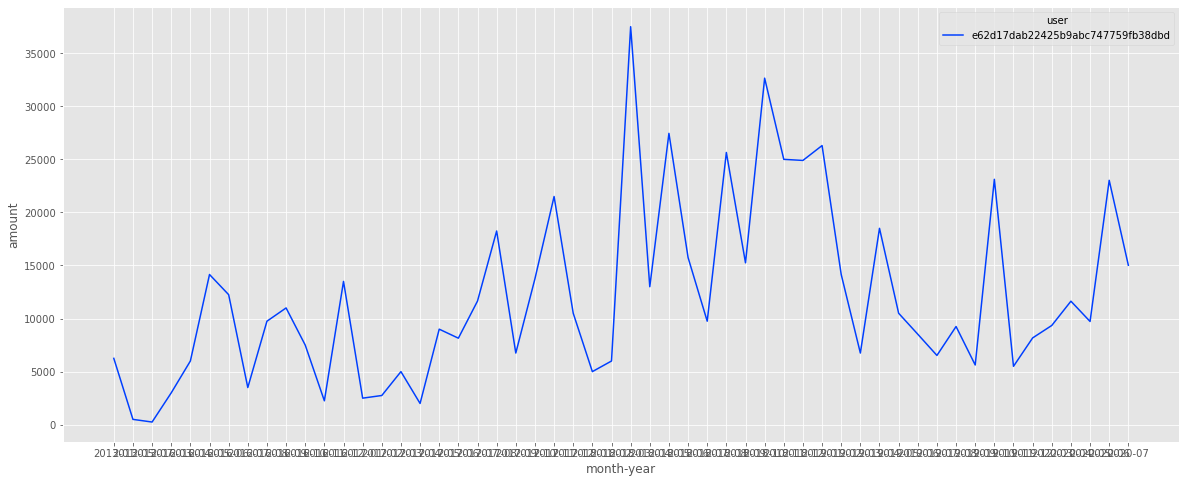

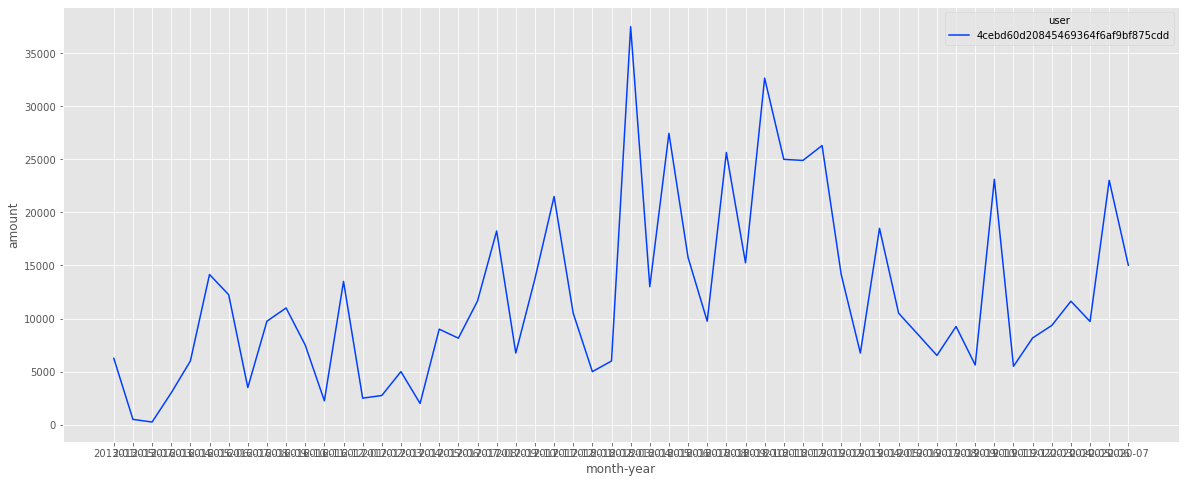

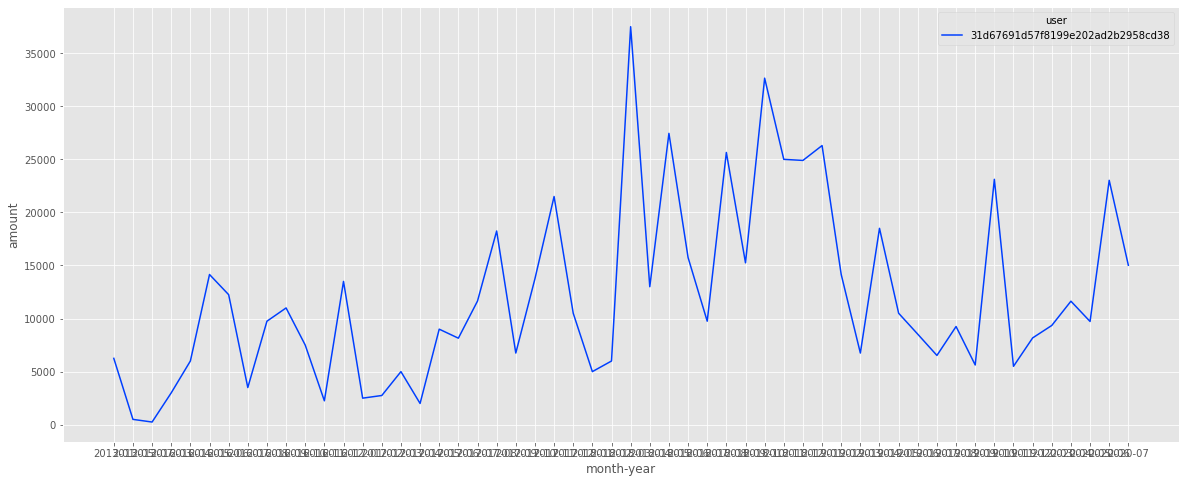

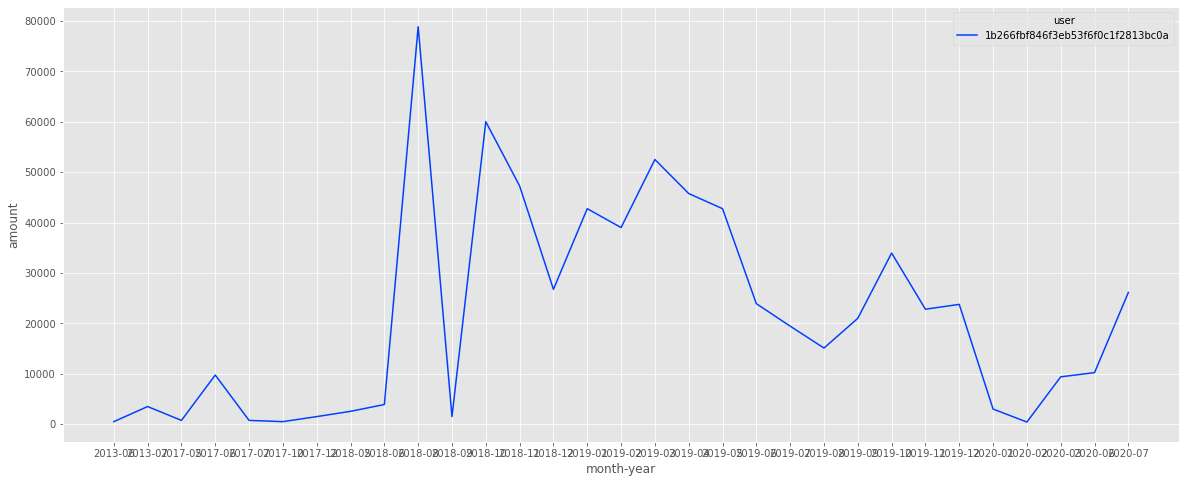

In [139]:

for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year', inplace=True)
        plt.figure(figsize=(20,8))
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')
        

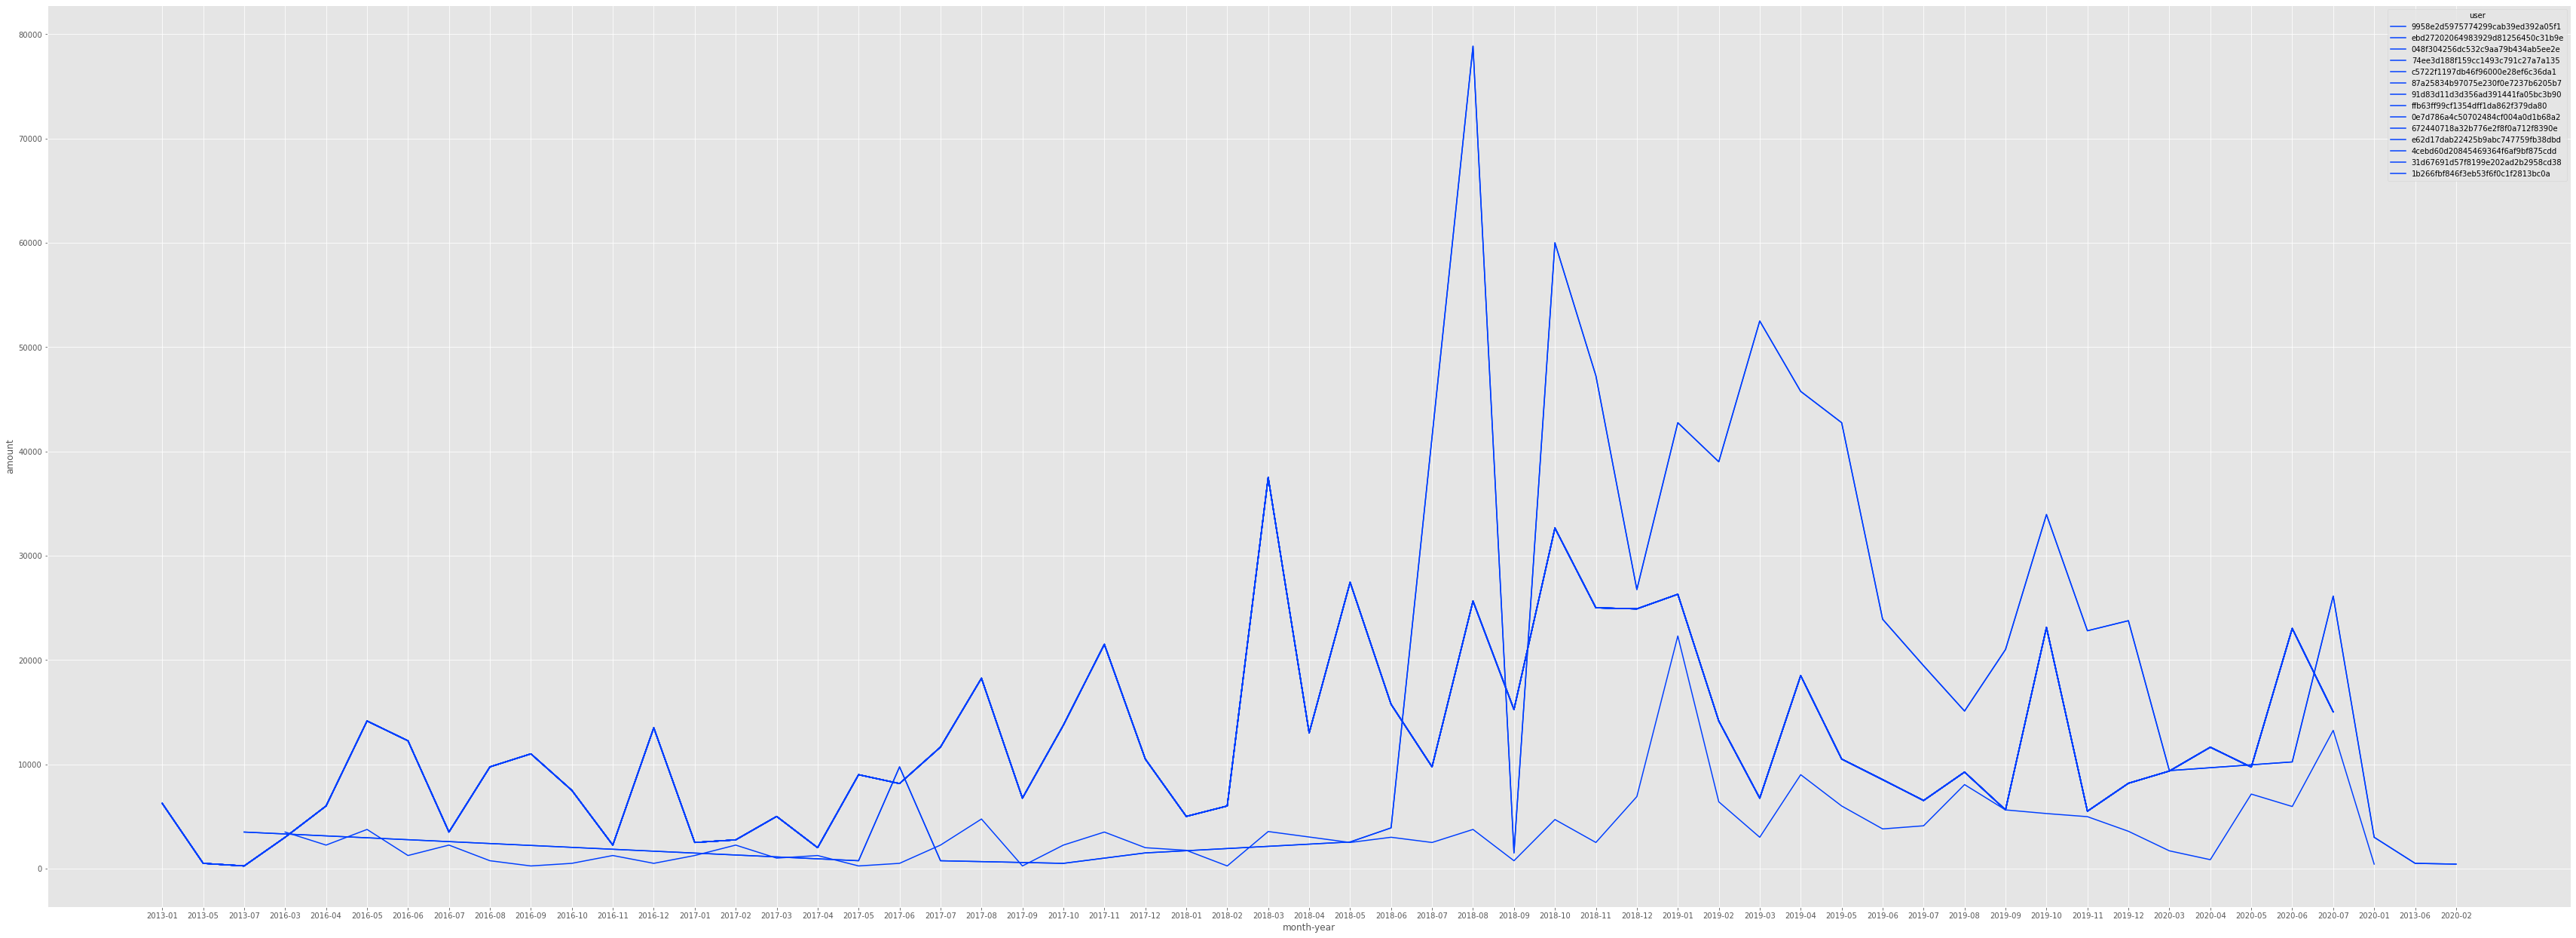

In [140]:
plt.figure(figsize=(60,22))
for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year',inplace=True)
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')

## User Location

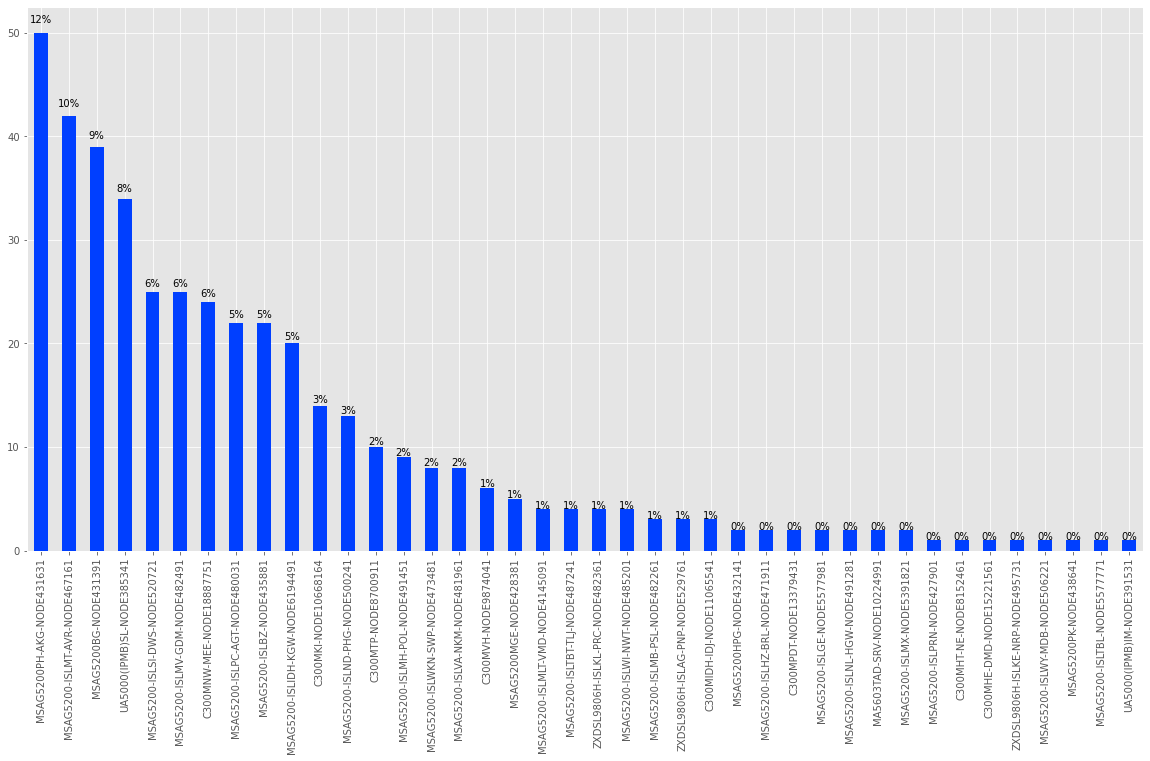

In [65]:
ax =cluster_0["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

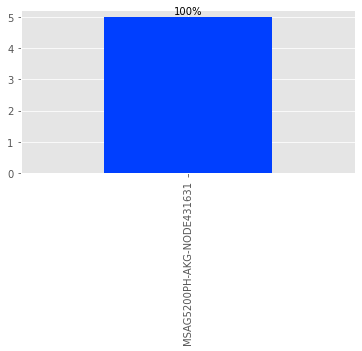

In [66]:
ax =cluster_0_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(6,3))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

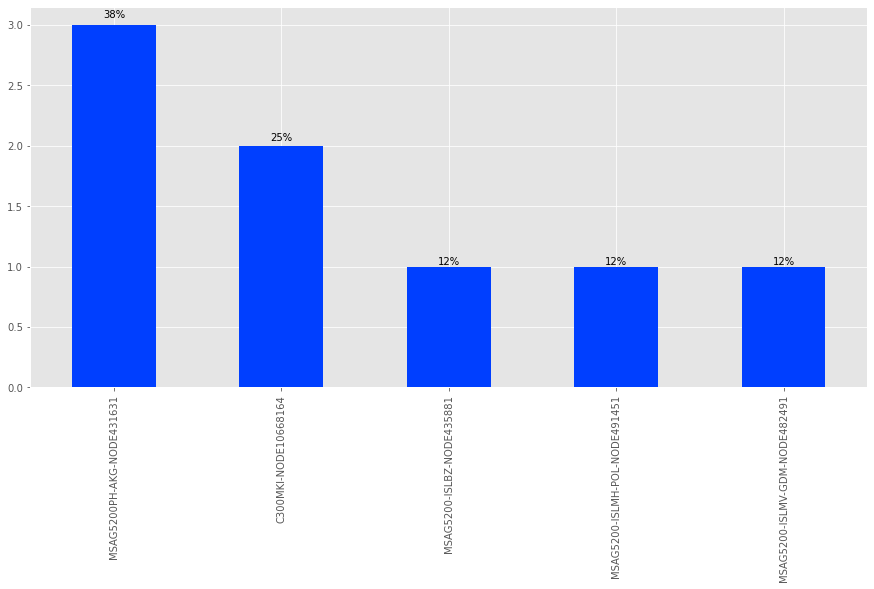

In [67]:
ax =cluster_0_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play BV customers

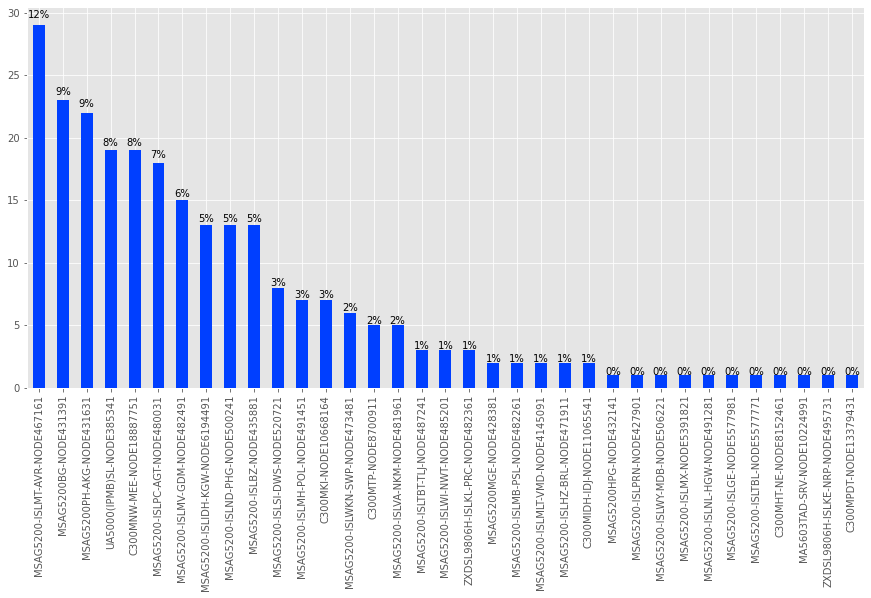

In [68]:
ax =cluster_0_bb_dp["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

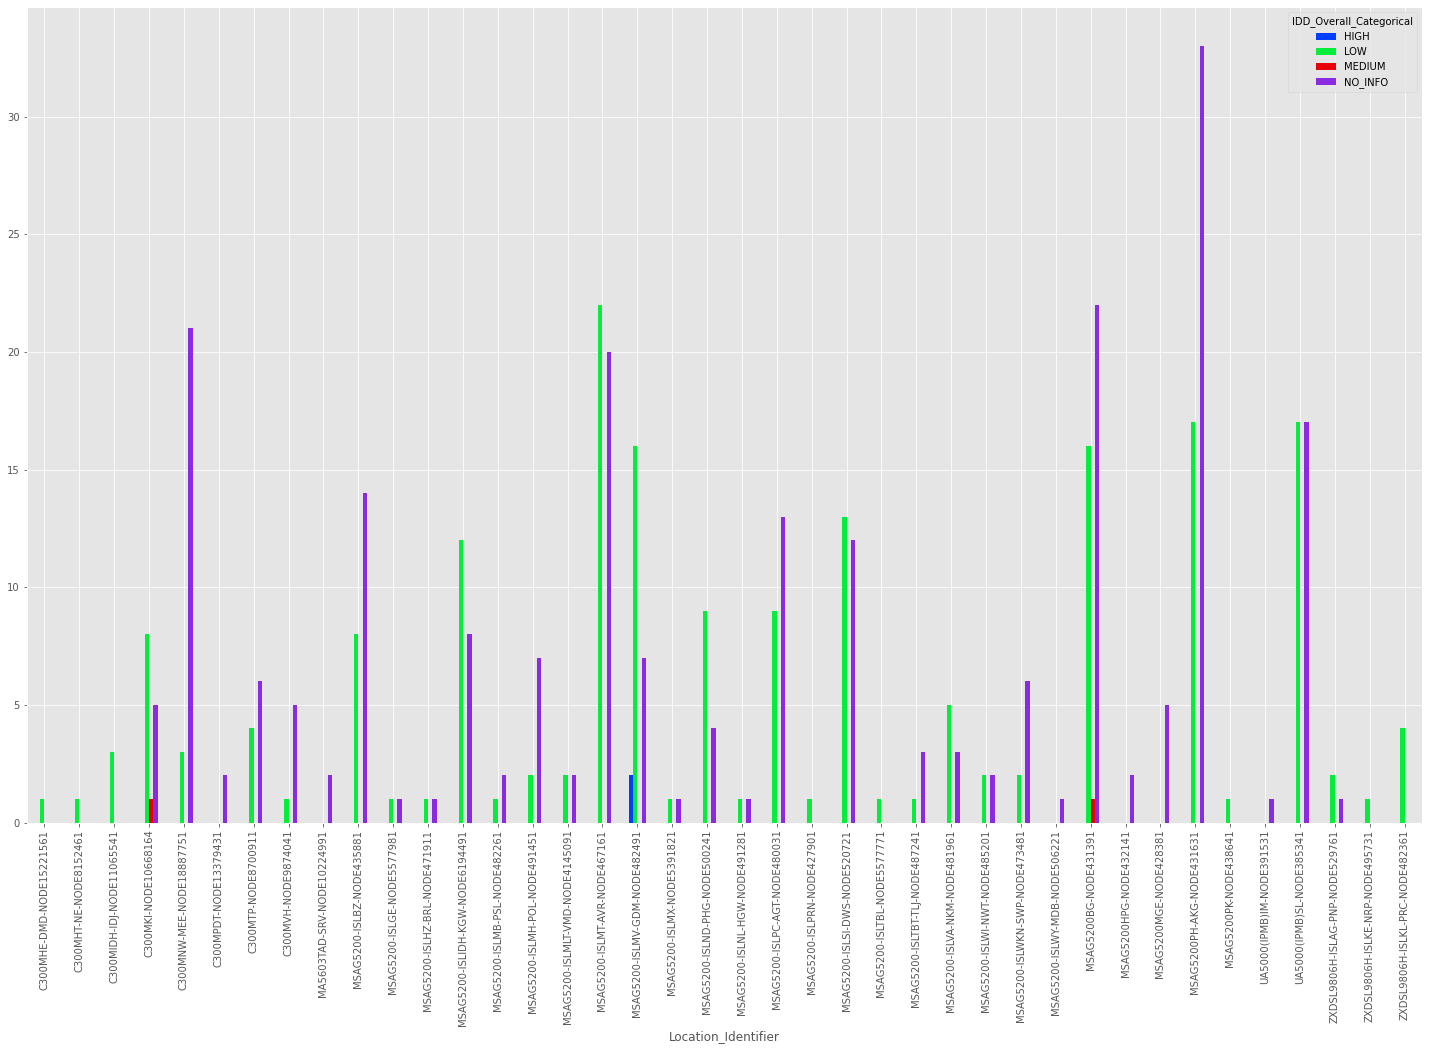

In [69]:
#ax =cluster_0[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_0[(cluster_0["Location_Identifier"] != "NO_INFO")].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

<ipython-input-70-fc08a43123d8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(1, 0, 'MSAG5200PK-NODE438641'),
 Text(2, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(3, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(4, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(5, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(6, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(7, 0, 'C300MKI-NODE10668164'),
 Text(8, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(9, 0, 'MSAG5200-ISLPRN-NODE427901'),
 Text(10, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(11, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(12, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(13, 0, 'MA5603TAD-SRV-NODE10224991'),
 Text(14, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(15, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(16, 0, 'MSAG5200-ISLMX-NODE5391821'),
 Text(17, 0, 'MSAG5200-ISLGE-NODE5577981'),
 Text(18, 0, 'MSAG5200-ISLPC-AGT-NODE480031'),
 Text(19, 0, 'MSAG5200HPG-NODE432141'),
 Text(20, 0, 'MSAG5200MGE-NODE428381'),
 Text(21, 0, 'ZXDSL9806H-ISLKE-NRP-NODE495731'),
 Text(22, 0, 'MSAG5

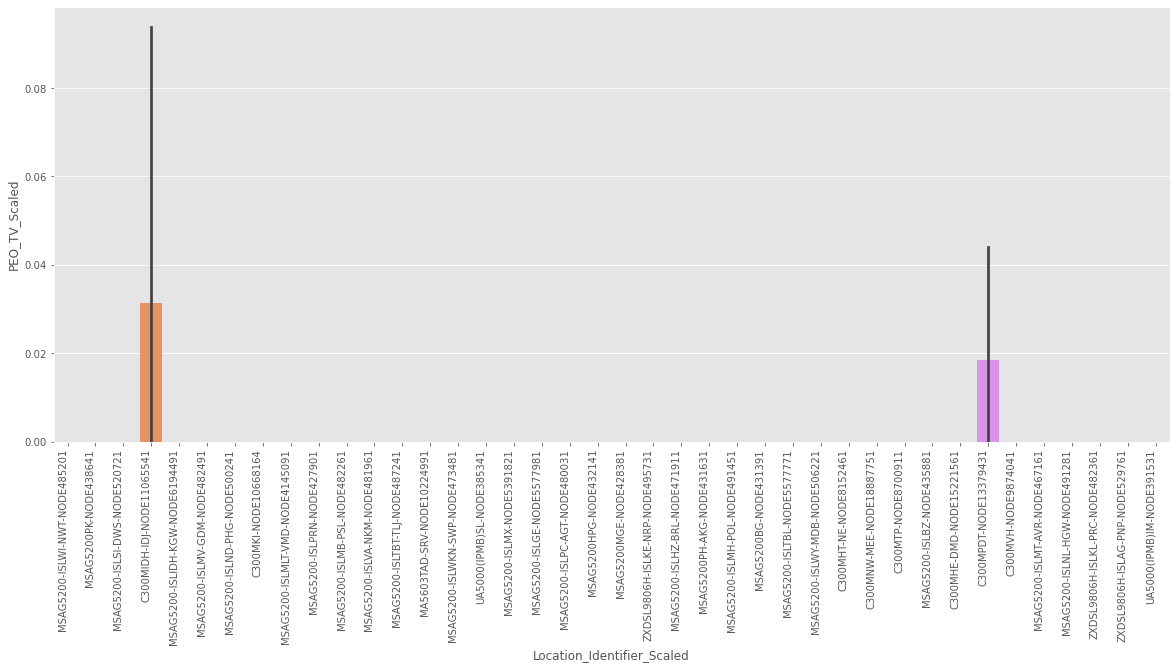

In [70]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_0[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [71]:
location_arr = cluster_0["Location_Identifier"].unique()

<ipython-input-72-5bf5f974f3db>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



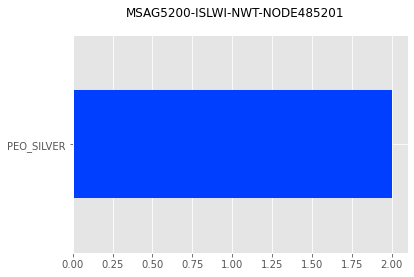

<Figure size 432x288 with 0 Axes>

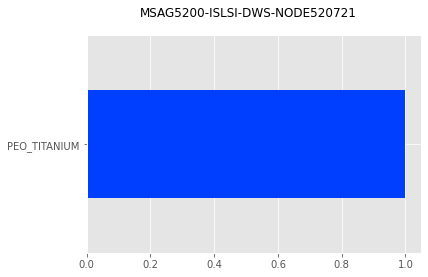

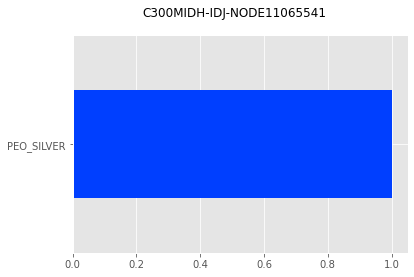

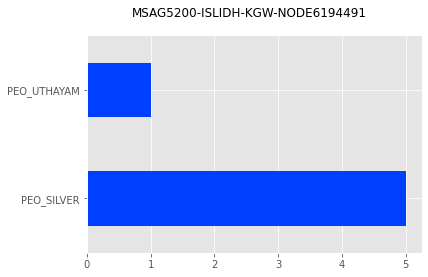

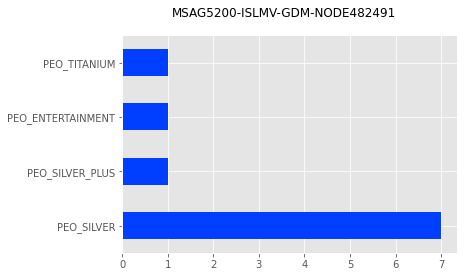

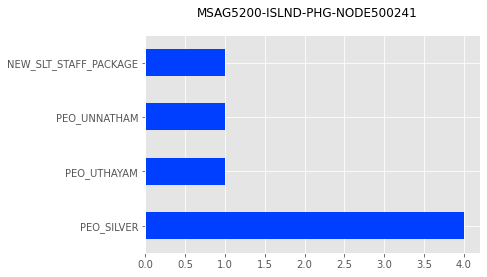

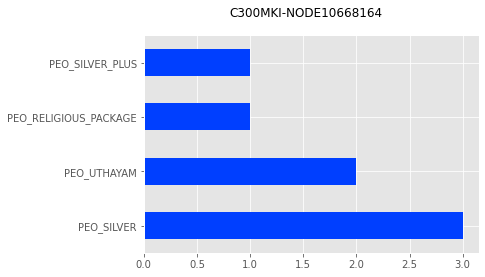

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

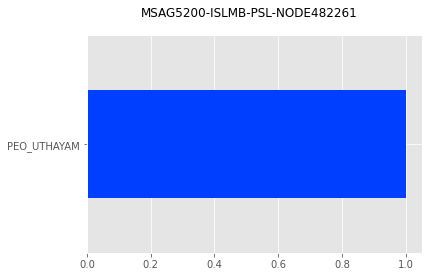

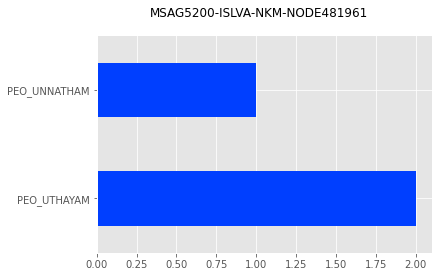

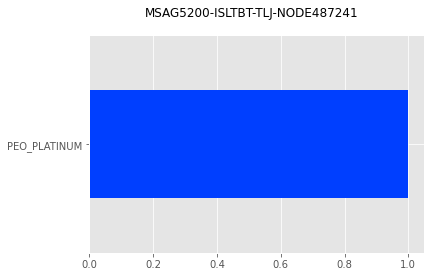

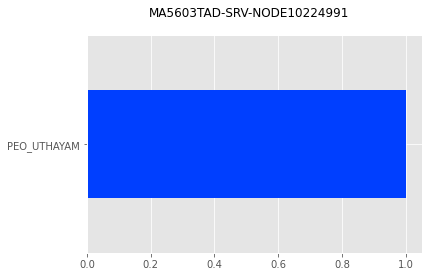

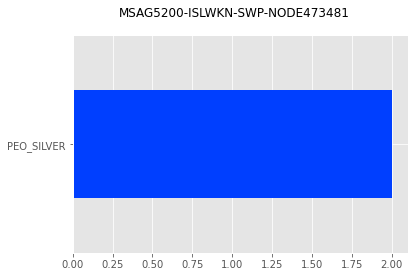

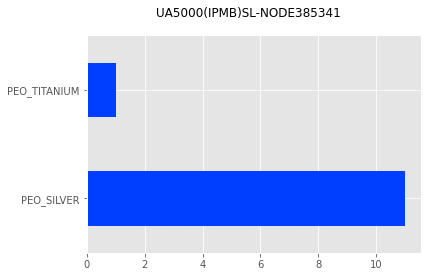

<Figure size 432x288 with 0 Axes>

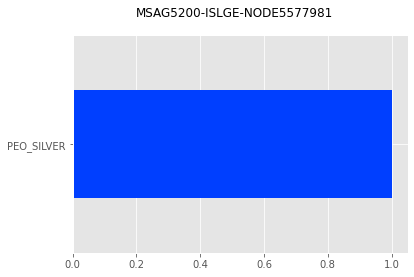

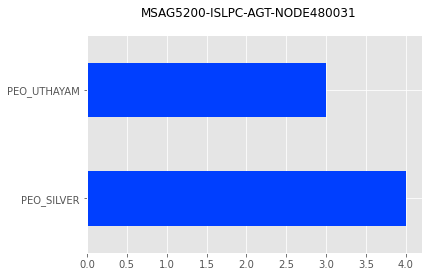

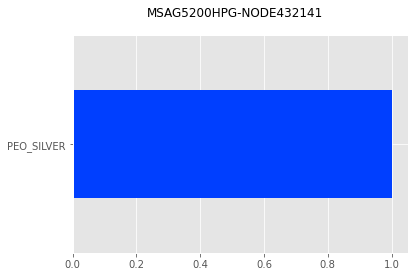

<Figure size 432x288 with 0 Axes>

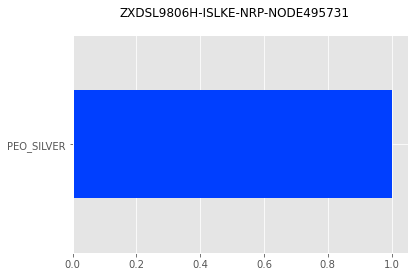

<Figure size 432x288 with 0 Axes>

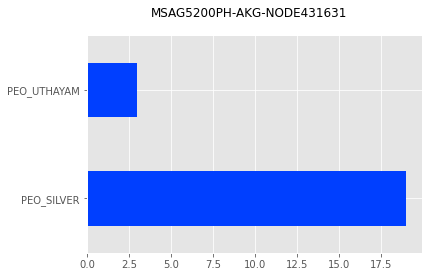

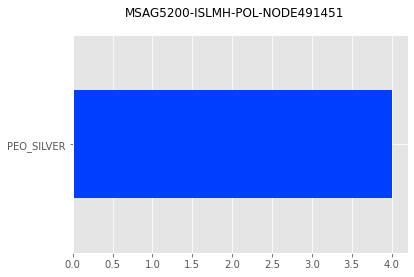

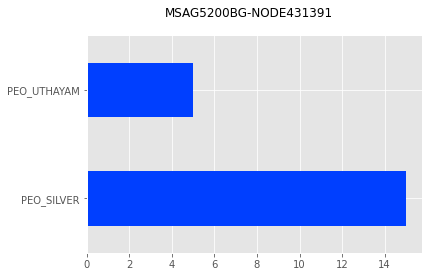

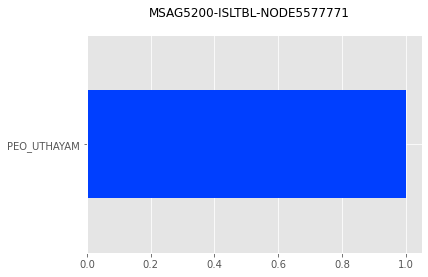

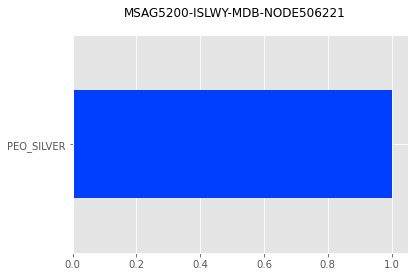

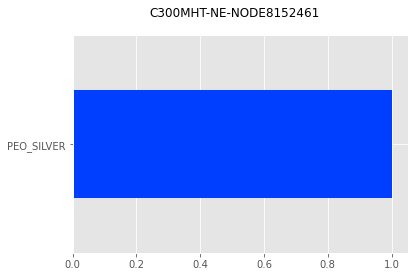

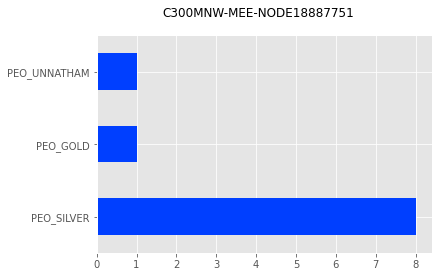

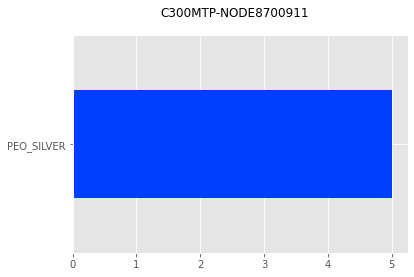

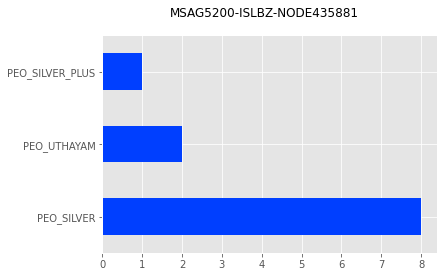

<Figure size 432x288 with 0 Axes>

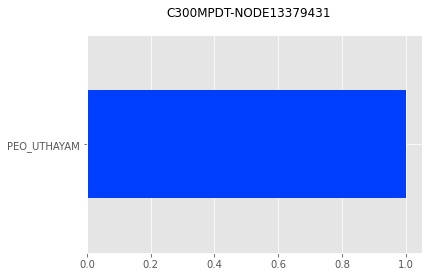

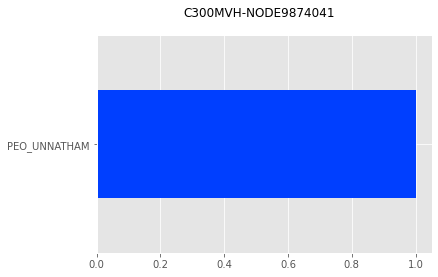

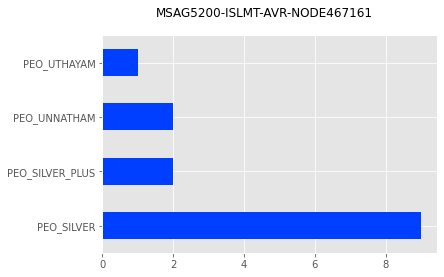

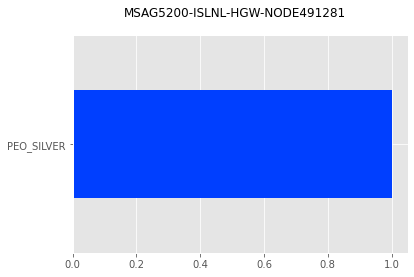

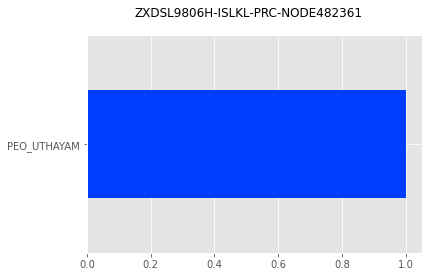

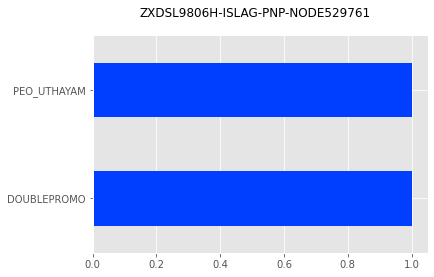

<Figure size 432x288 with 0 Axes>

In [72]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-73-89e206bfdebb>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

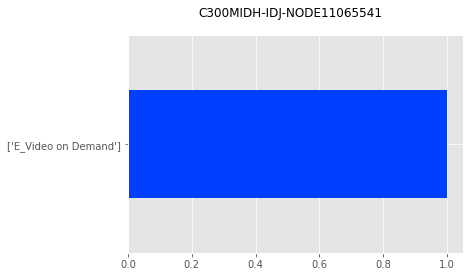

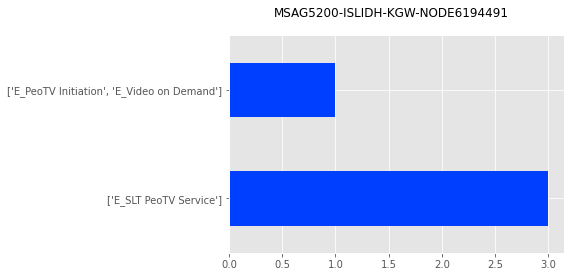

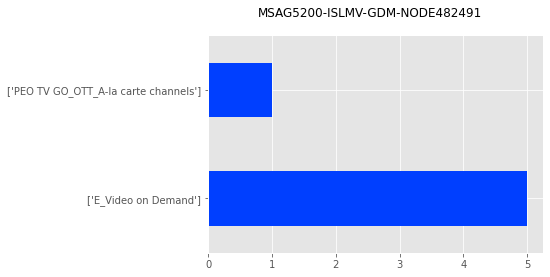

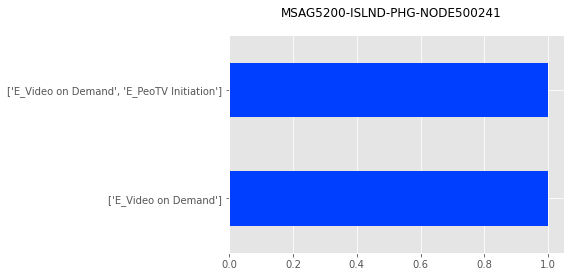

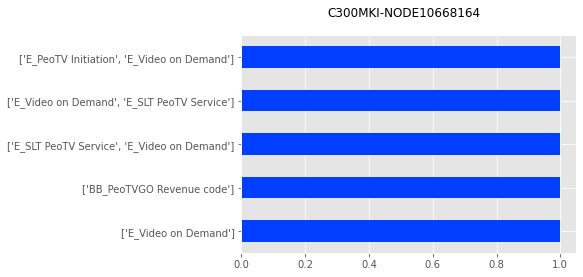

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

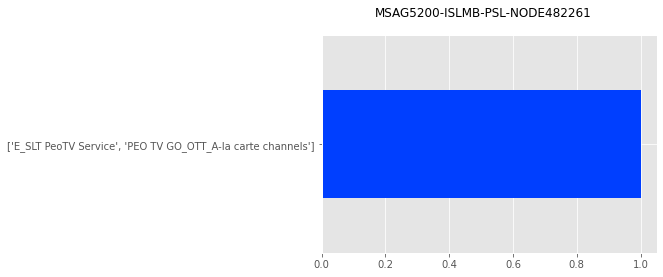

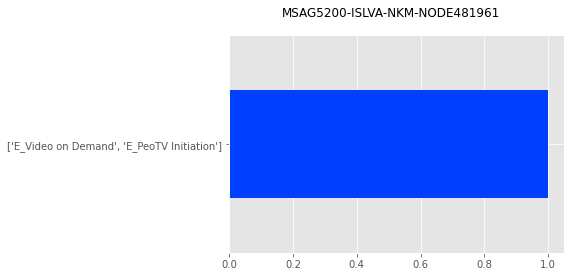

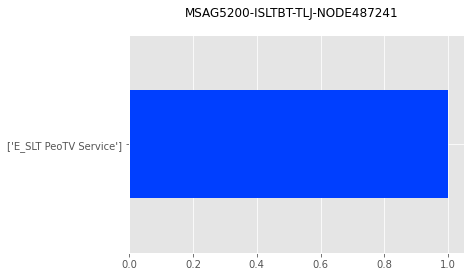

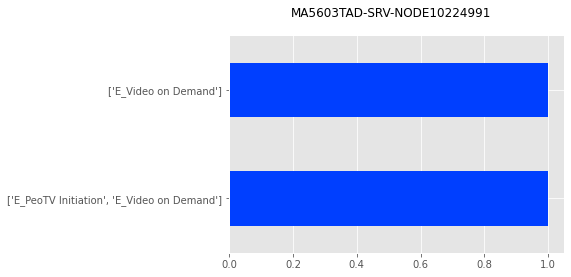

<Figure size 432x288 with 0 Axes>

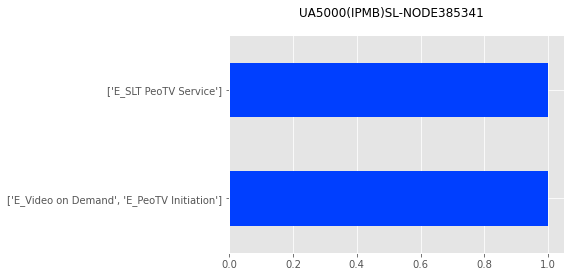

<Figure size 432x288 with 0 Axes>

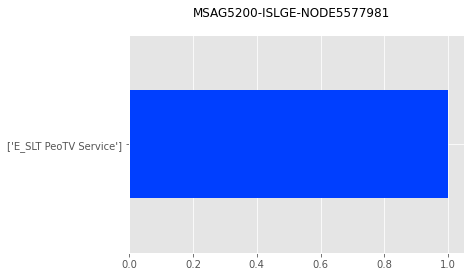

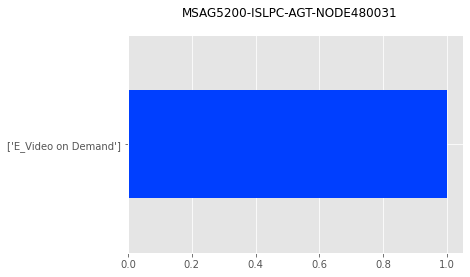

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

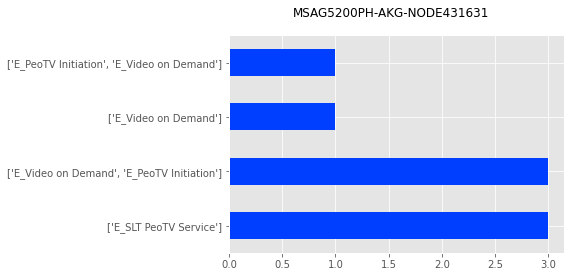

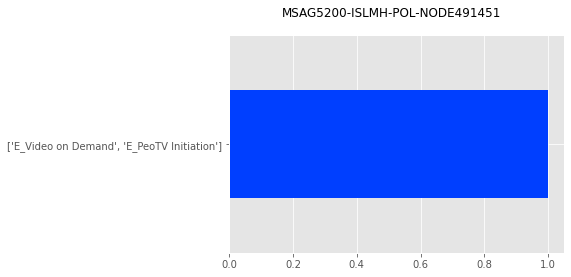

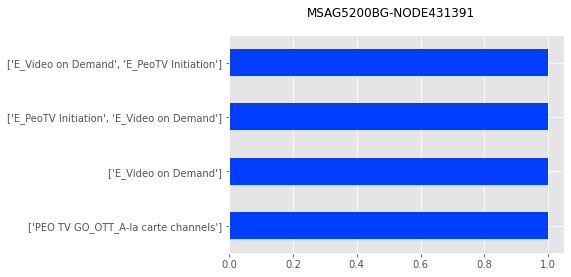

<Figure size 432x288 with 0 Axes>

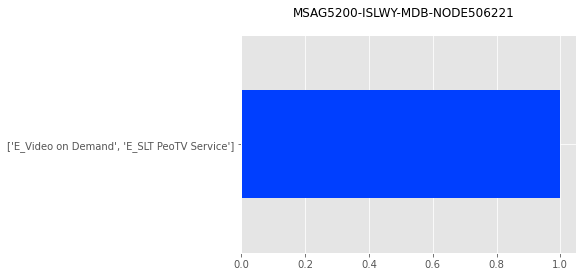

<Figure size 432x288 with 0 Axes>

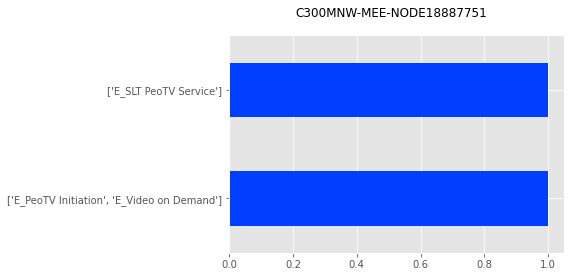

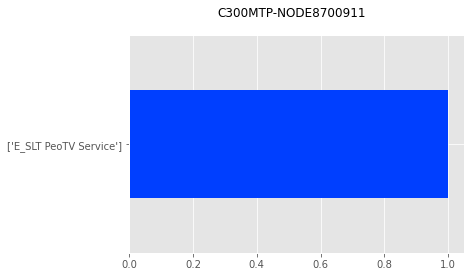

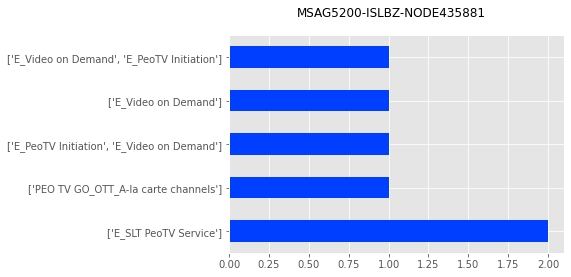

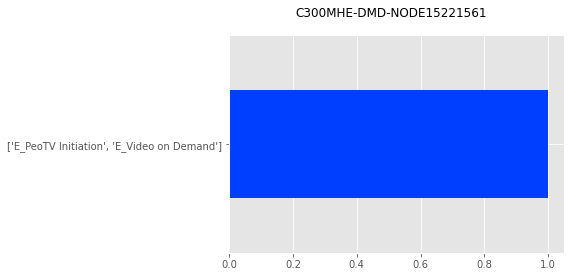

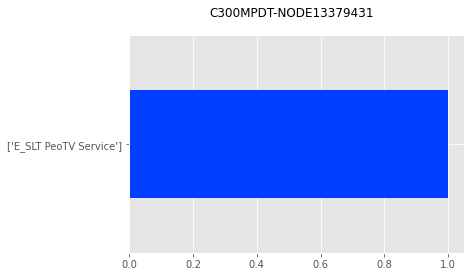

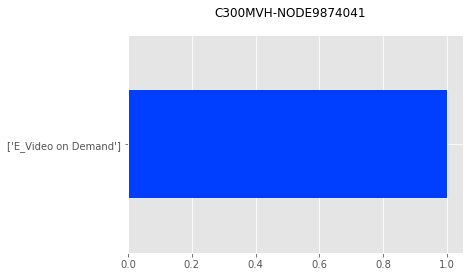

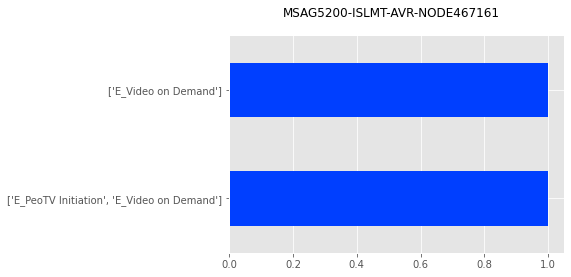

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

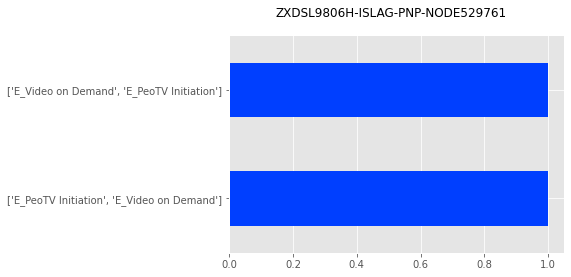

<Figure size 432x288 with 0 Axes>

In [73]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-74-d0c3ce37ea15>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

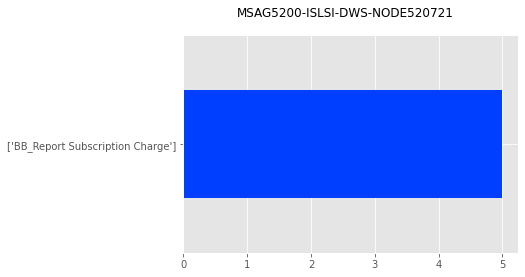

<Figure size 432x288 with 0 Axes>

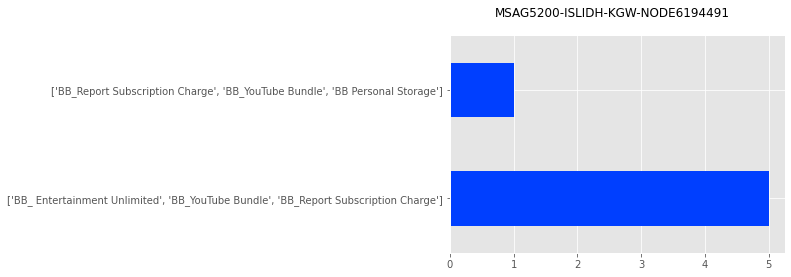

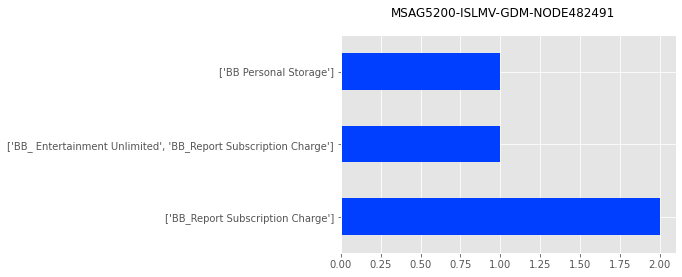

<Figure size 432x288 with 0 Axes>

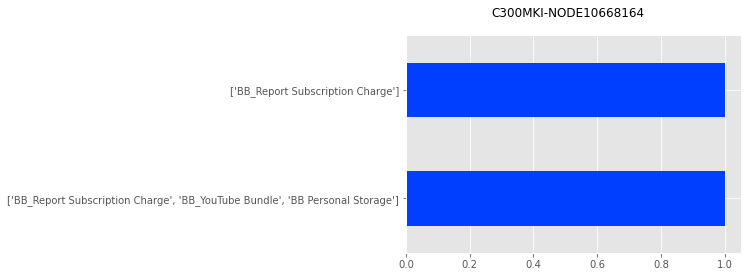

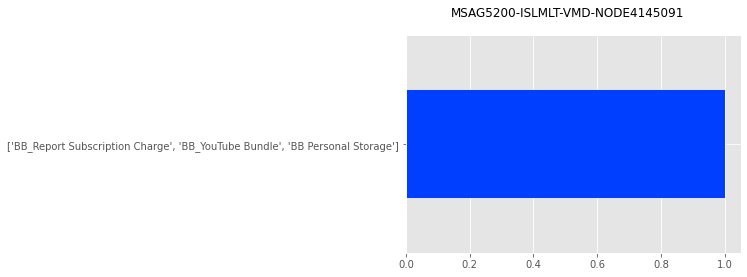

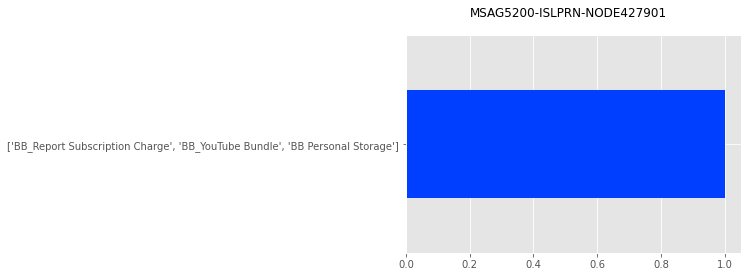

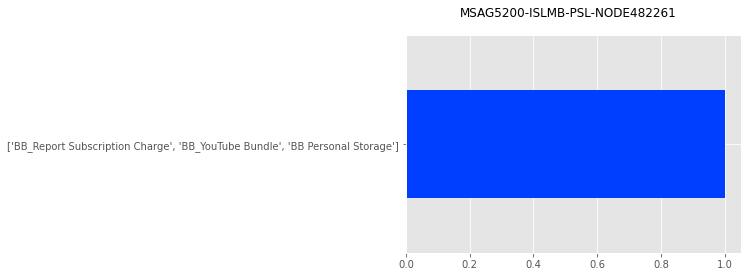

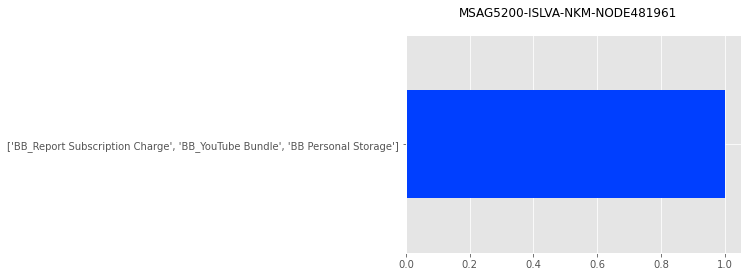

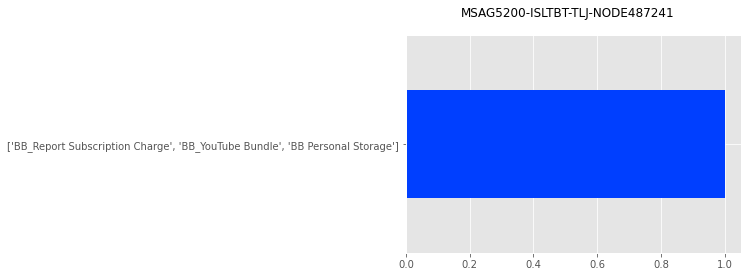

<Figure size 432x288 with 0 Axes>

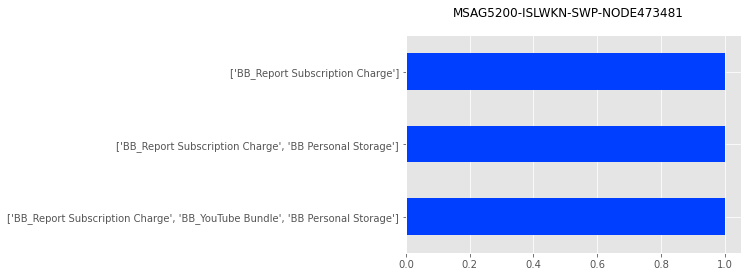

<Figure size 432x288 with 0 Axes>

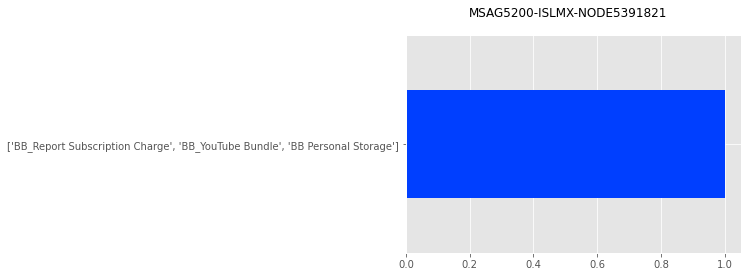

<Figure size 432x288 with 0 Axes>

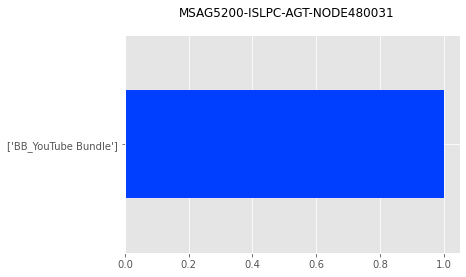

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

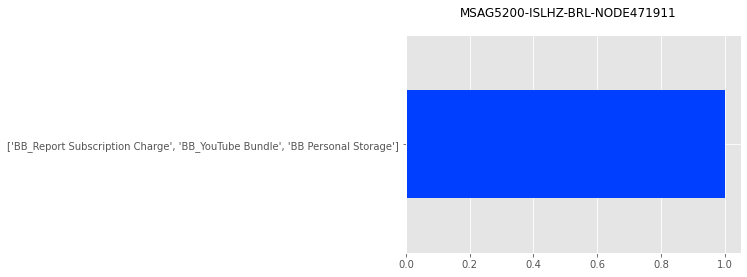

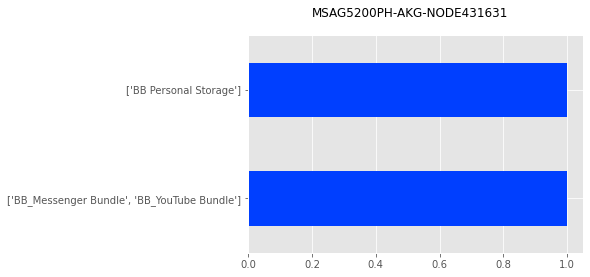

<Figure size 432x288 with 0 Axes>

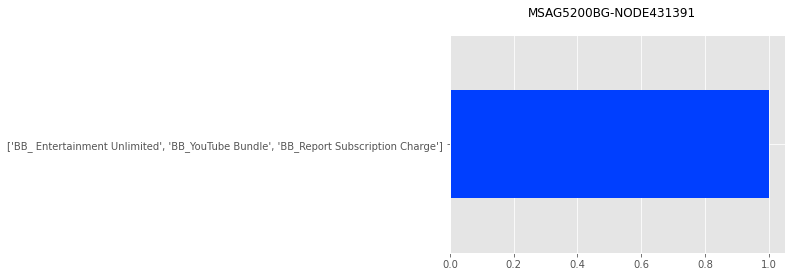

<Figure size 432x288 with 0 Axes>

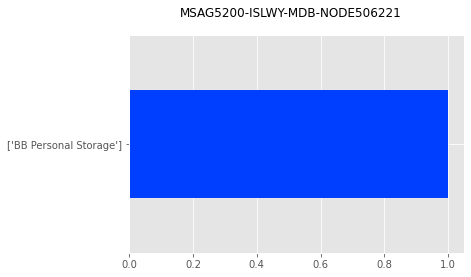

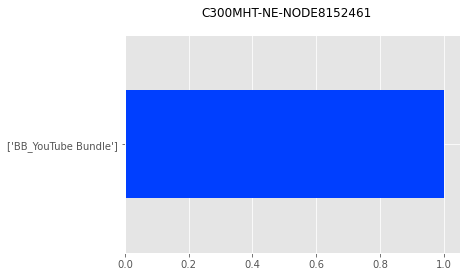

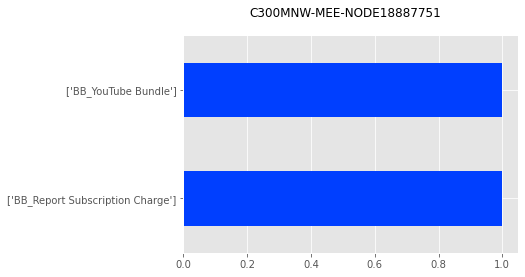

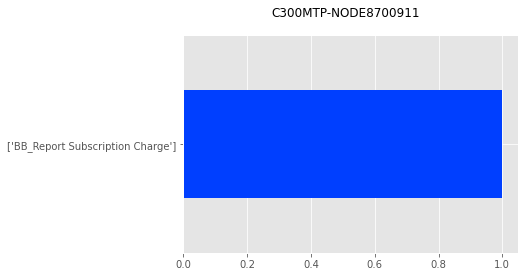

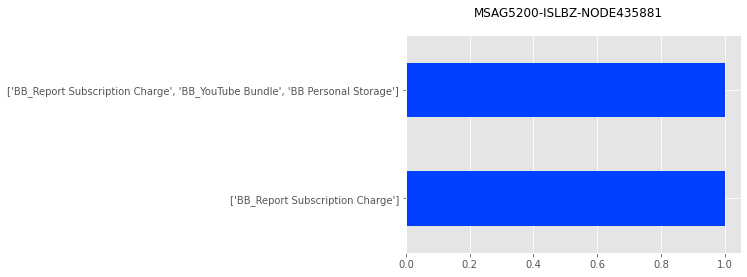

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

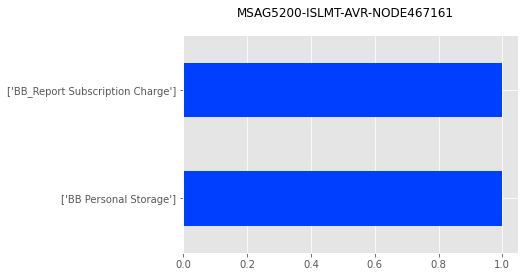

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [74]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

<AxesSubplot:ylabel='GENDER'>

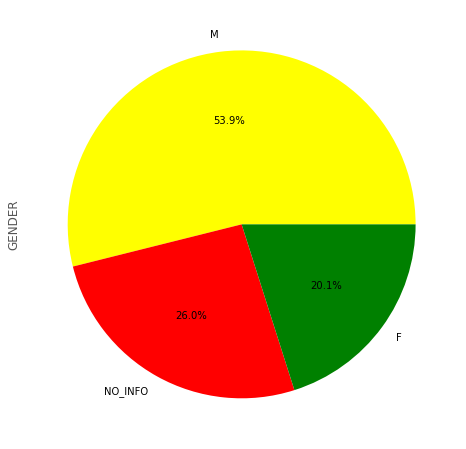

In [75]:
cluster_0["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['yellow','red','green'])

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

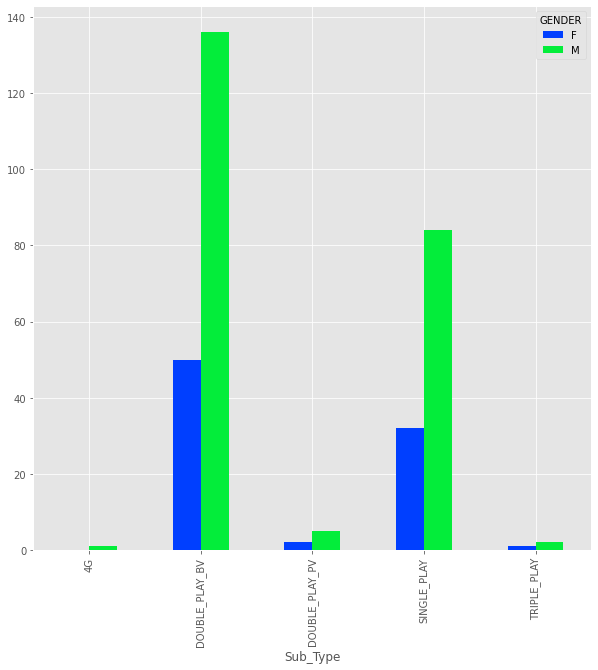

In [76]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

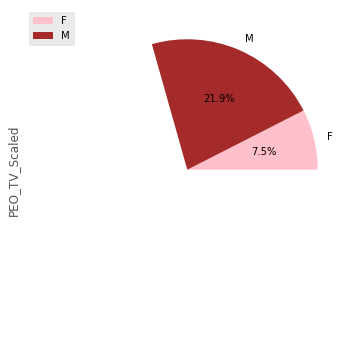

In [77]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

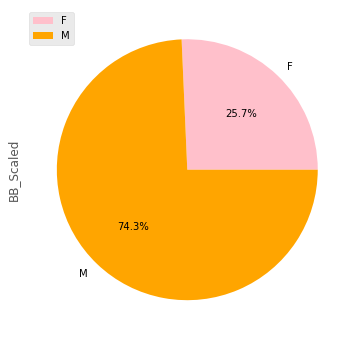

In [78]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

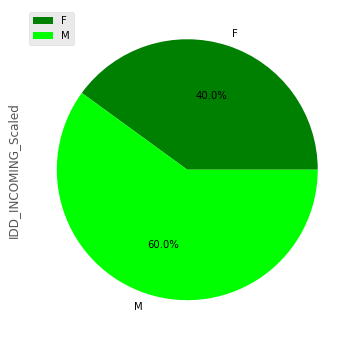

In [79]:
cluster_0[(cluster_0["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("green","lime"), subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

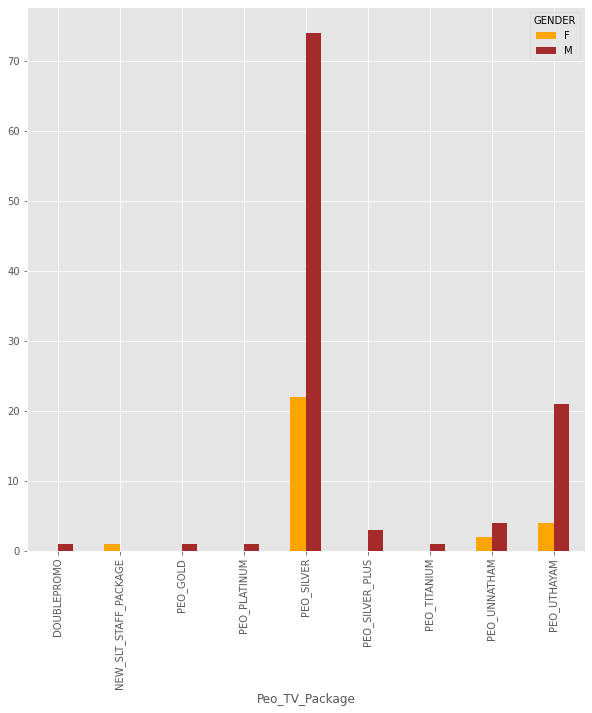

In [80]:
 cluster_0[((cluster_0["GENDER"] != "NO_INFO") &(cluster_0["Peo_TV_Package"] != "NO_INFO"))].groupby(["Peo_TV_Package", "GENDER"]).size().unstack().plot.bar(figsize=(10,10),color=("orange", "brown"))

## AGE Analysis

In [81]:
cluster_0["AGE"].describe()

count    313.000000
mean      55.185304
std       13.482569
min       26.000000
25%       45.000000
50%       54.000000
75%       65.000000
max       93.000000
Name: AGE, dtype: float64

In [82]:
bins = [0, 30,55,65,85,110]
cluster_0['AGE_Groups'] = pd.cut(cluster_0['AGE'], bins)

<ipython-input-82-985f5b1e5f2d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

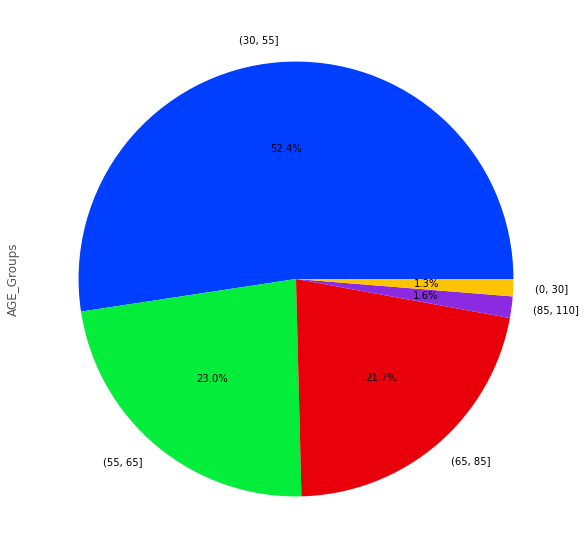

In [83]:
cluster_0["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

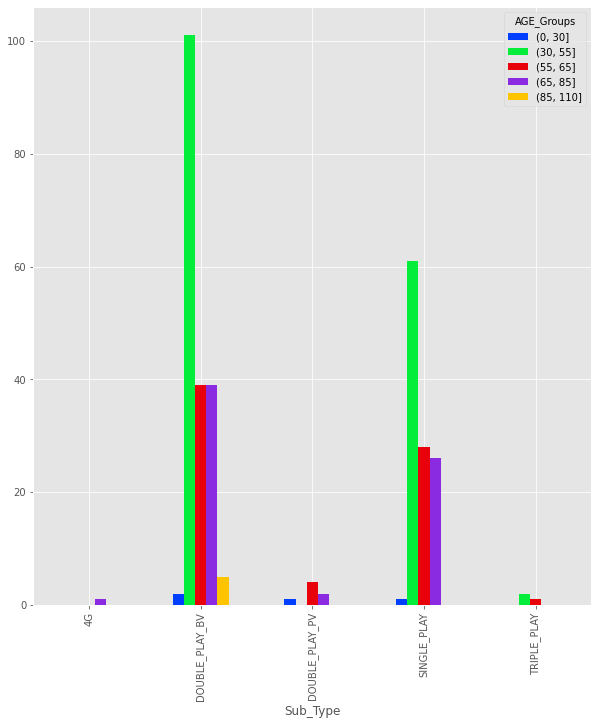

In [84]:
cluster_0.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Age Groups

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

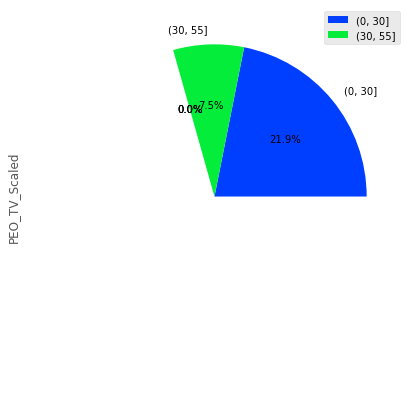

In [85]:
cluster_0[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Age Groups

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

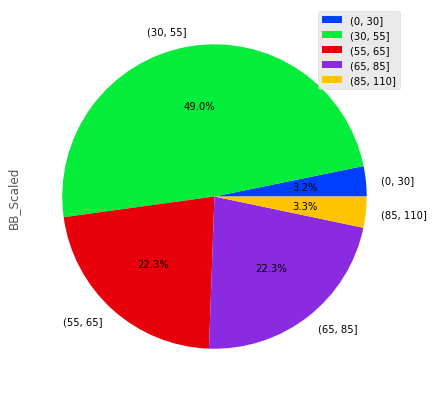

In [86]:
cluster_0[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Age Groups

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

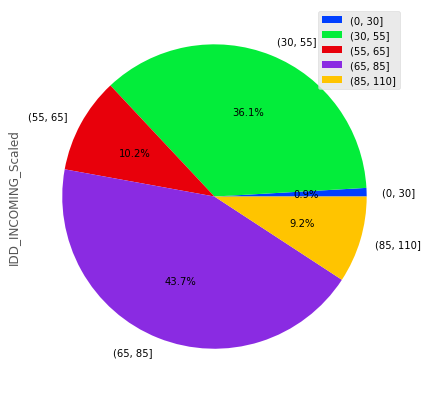

In [87]:
cluster_0[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

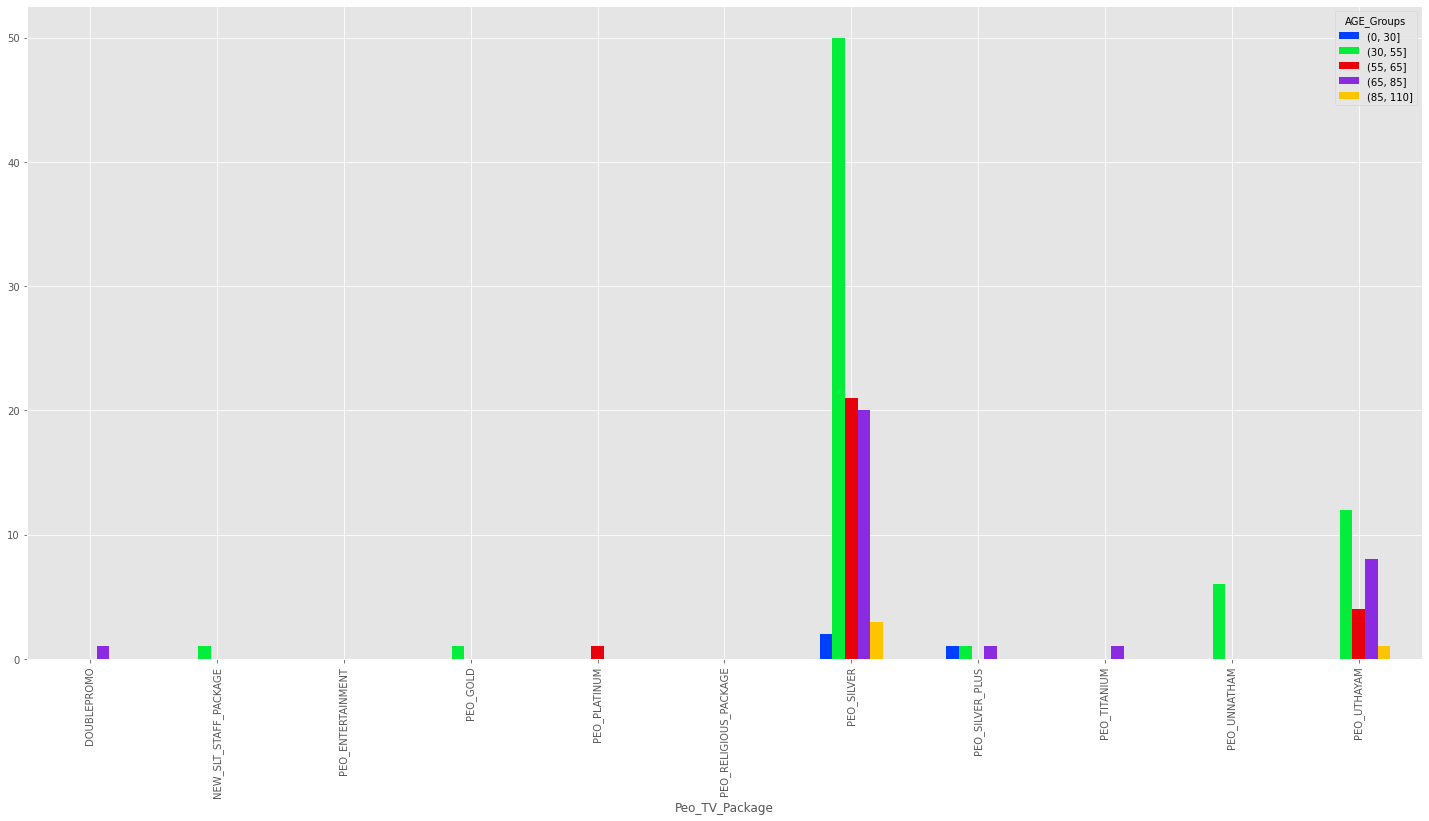

In [88]:
cluster_0[(cluster_0["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(25,12))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [89]:
cluster_0["Having_Insurance"].value_counts()

NO_INFO    358
YES         65
Name: Having_Insurance, dtype: int64

<AxesSubplot:xlabel='Having_Insurance'>

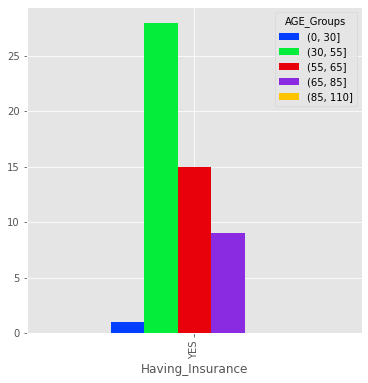

In [90]:
cluster_0[(cluster_0["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

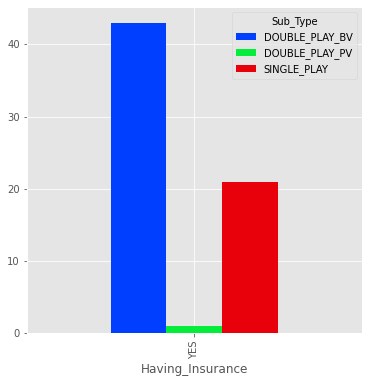

In [91]:
cluster_0[(cluster_0["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

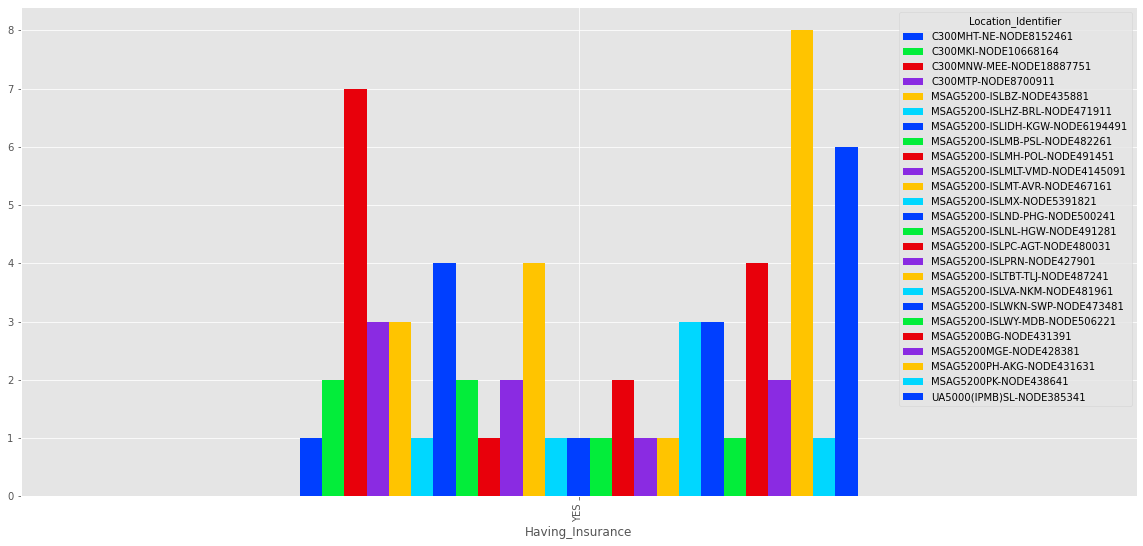

In [92]:
cluster_0[(cluster_0["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Senior citizens

In [93]:
cluster_0["Having_Senior_Citizen"].value_counts()

NO_INFO    356
YES         67
Name: Having_Senior_Citizen, dtype: int64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

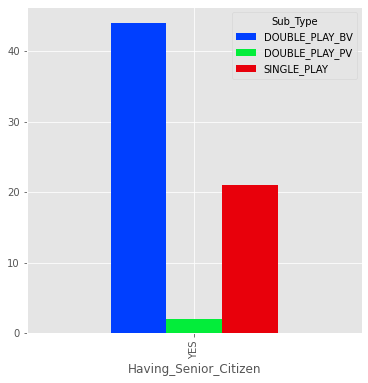

In [94]:
cluster_0[(cluster_0["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

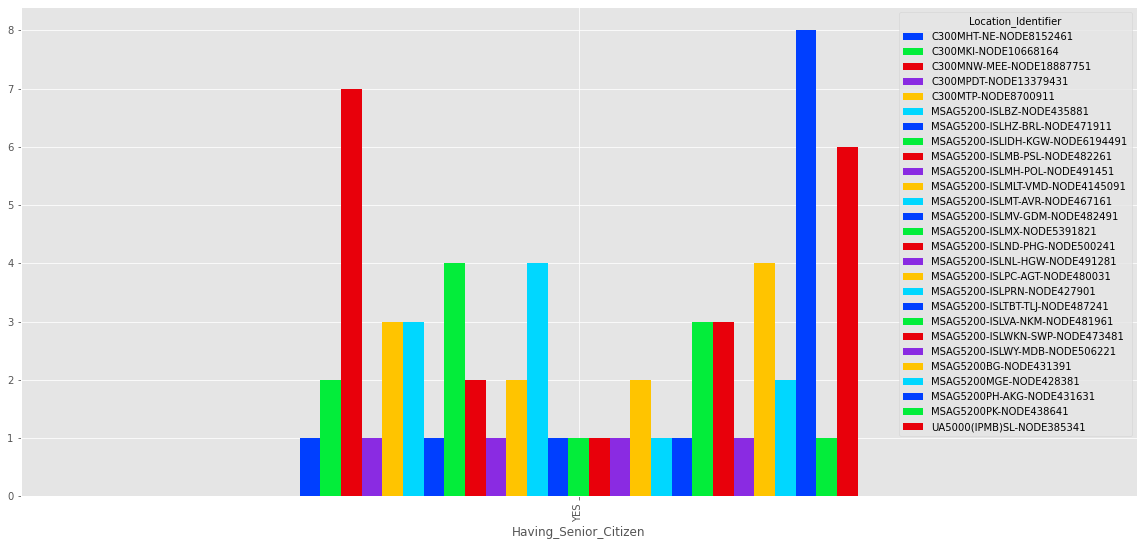

In [95]:
cluster_0[(cluster_0["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [96]:
cluster_0["Having_Family_Member_Abroad"].value_counts()

NO_INFO    301
YES        122
Name: Having_Family_Member_Abroad, dtype: int64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

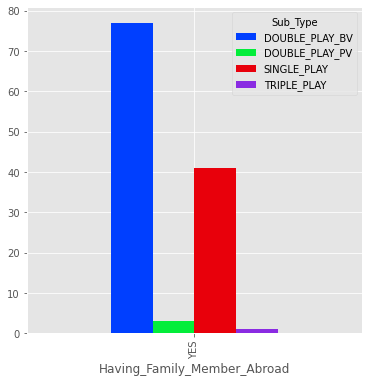

In [97]:
cluster_0[(cluster_0["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

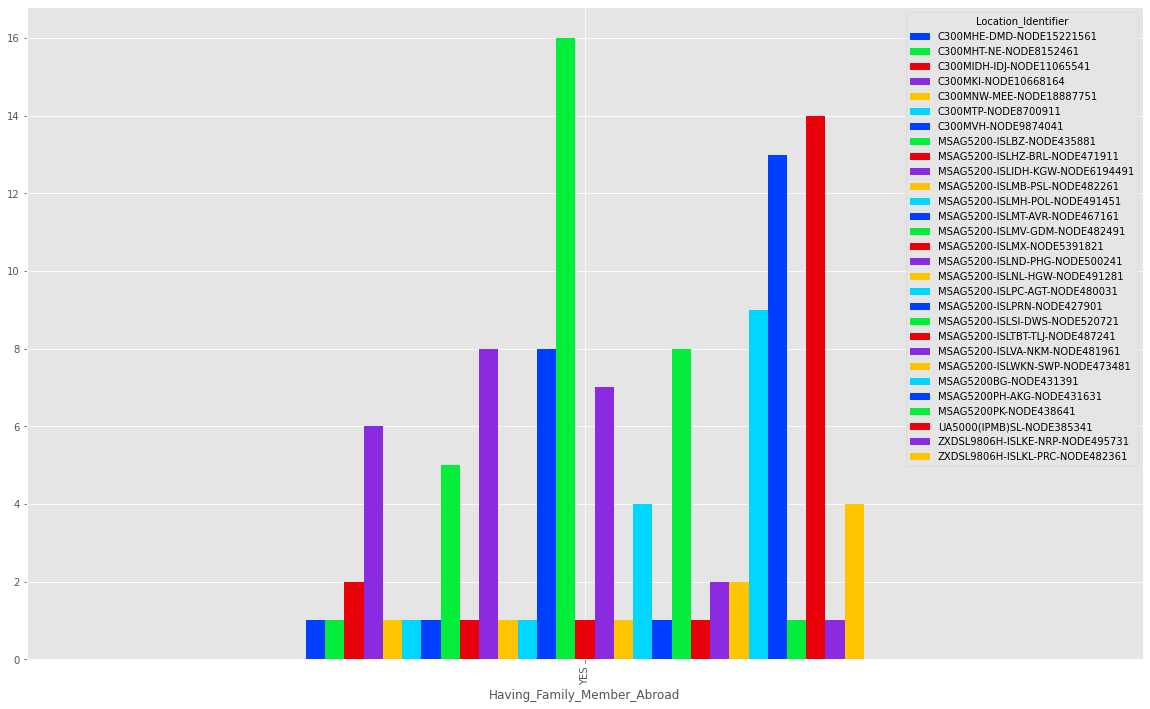

In [98]:
cluster_0[(cluster_0["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [99]:
cluster_0["Having_Working_Professionals"].value_counts()

NO_INFO    384
YES         39
Name: Having_Working_Professionals, dtype: int64

<AxesSubplot:xlabel='Having_Working_Professionals'>

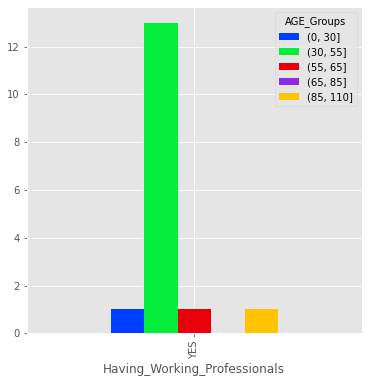

In [100]:
cluster_0[(cluster_0["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

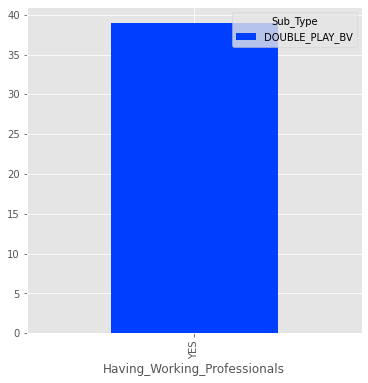

In [101]:
cluster_0[(cluster_0["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

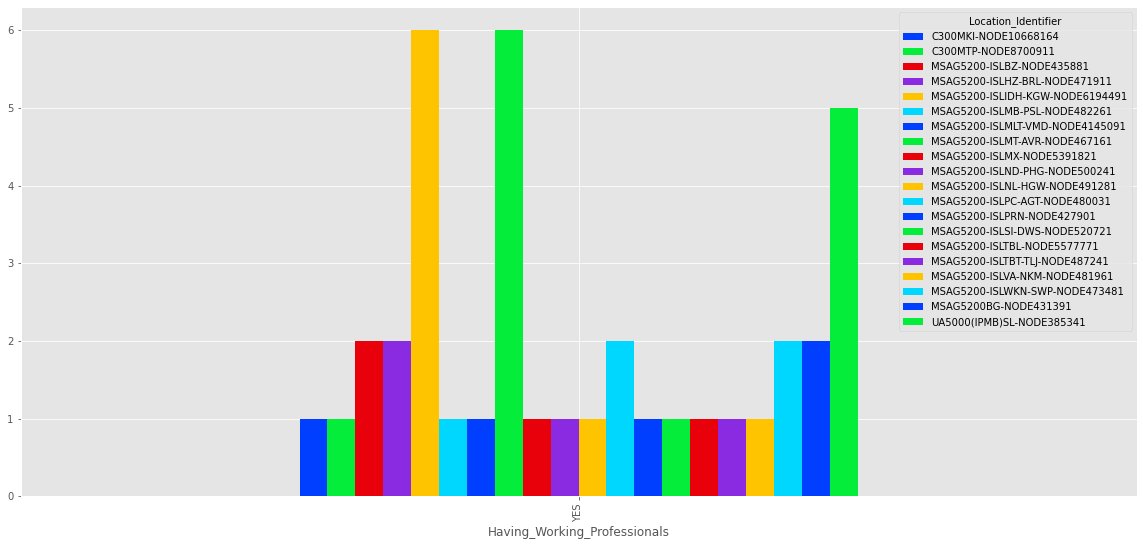

In [102]:
cluster_0[(cluster_0["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Teenagers Students

In [103]:
cluster_0["Having_Teenagers_Students"].value_counts()

NO_INFO    395
YES         28
Name: Having_Teenagers_Students, dtype: int64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

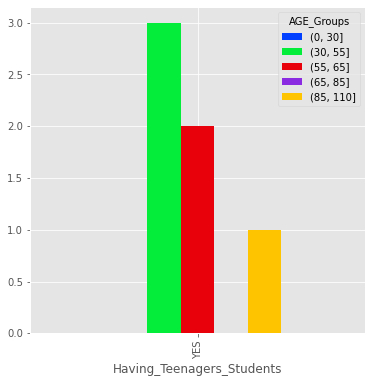

In [104]:
cluster_0[(cluster_0["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

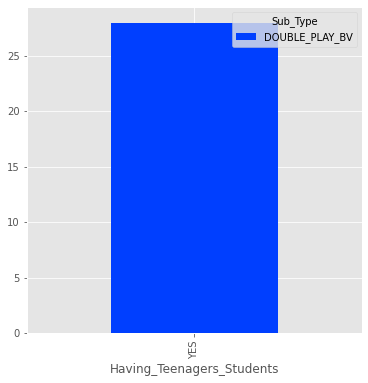

In [105]:
cluster_0[(cluster_0["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

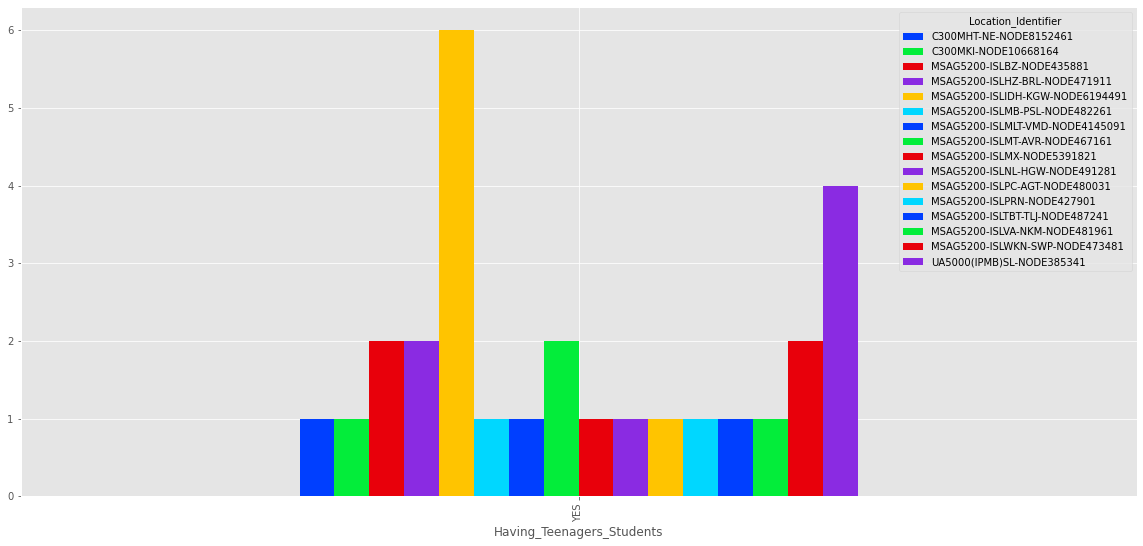

In [106]:
cluster_0[(cluster_0["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a Tamil customer

In [107]:
cluster_0["Tamil_Customer"].value_counts()

NO_INFO    391
YES         32
Name: Tamil_Customer, dtype: int64

<AxesSubplot:xlabel='Tamil_Customer'>

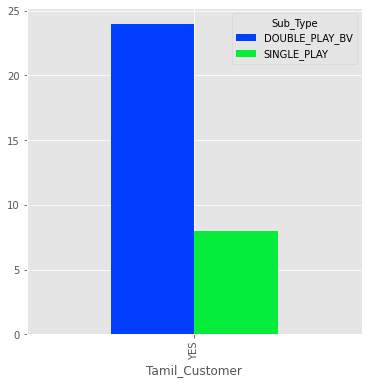

In [108]:
cluster_0[(cluster_0["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Tamil_Customer'>

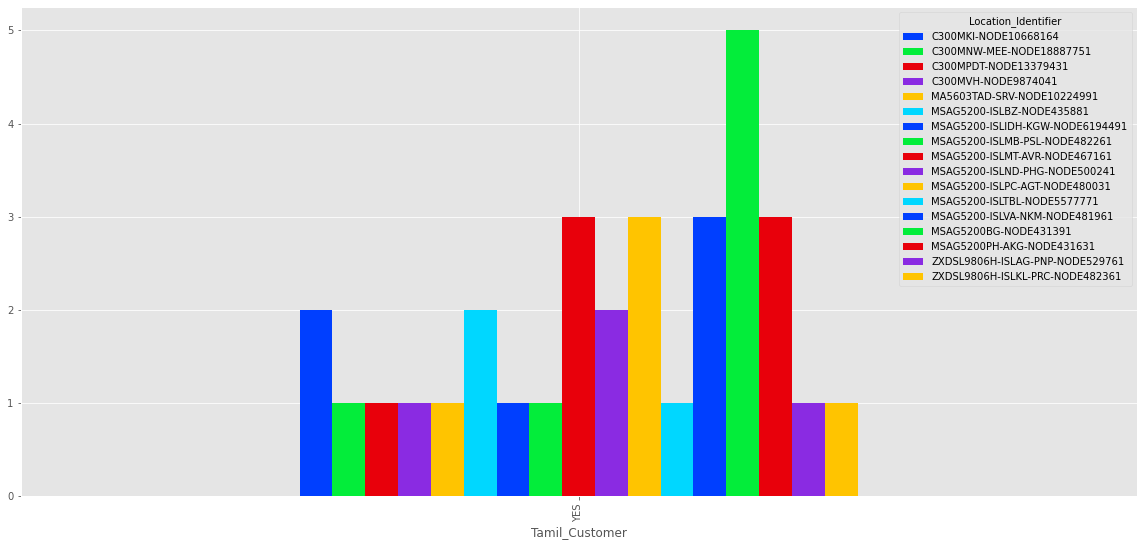

In [109]:
cluster_0[(cluster_0["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Kids at Home

In [110]:
cluster_0["Having_Kids_at_Home"].value_counts()

NO_INFO    406
YES         17
Name: Having_Kids_at_Home, dtype: int64

<AxesSubplot:xlabel='Having_Kids_at_Home'>

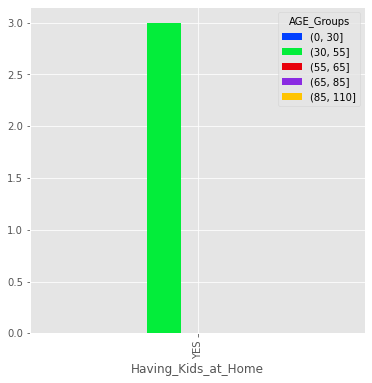

In [111]:
cluster_0[(cluster_0["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

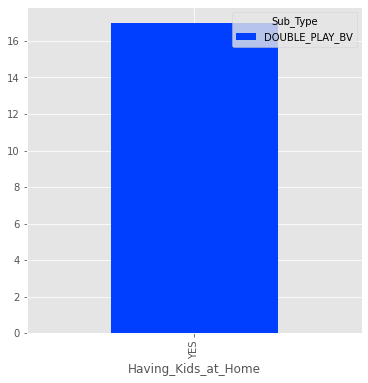

In [112]:
cluster_0[(cluster_0["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

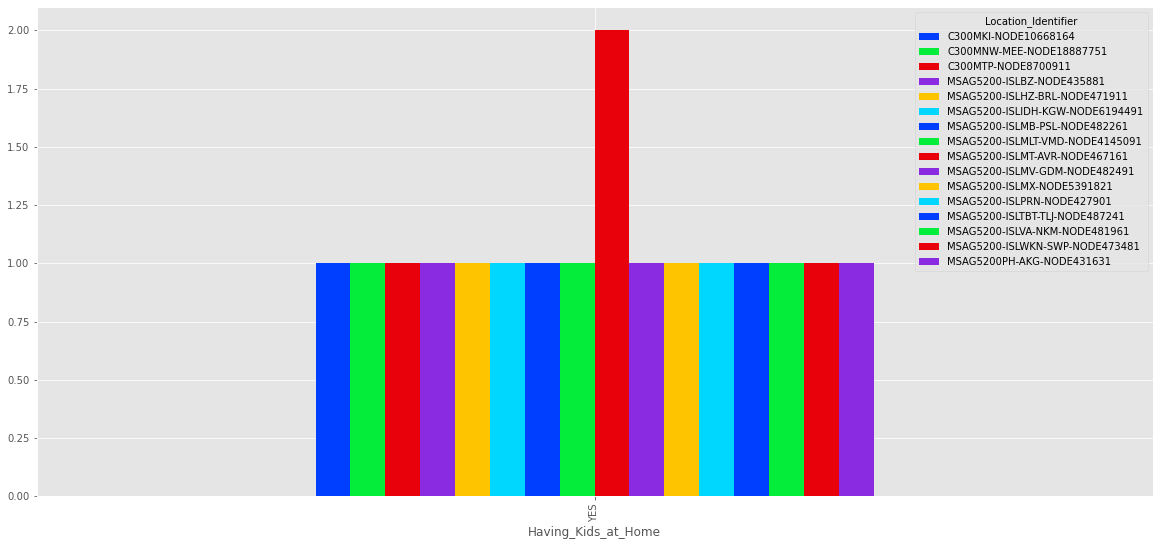

In [113]:
cluster_0[(cluster_0["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

### Identifying factors for recommending Packages for Cluster 0

#### Feasible locations to offer PeoTV

In [114]:
cluster_0_peo_loc = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY") | (cluster_0["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

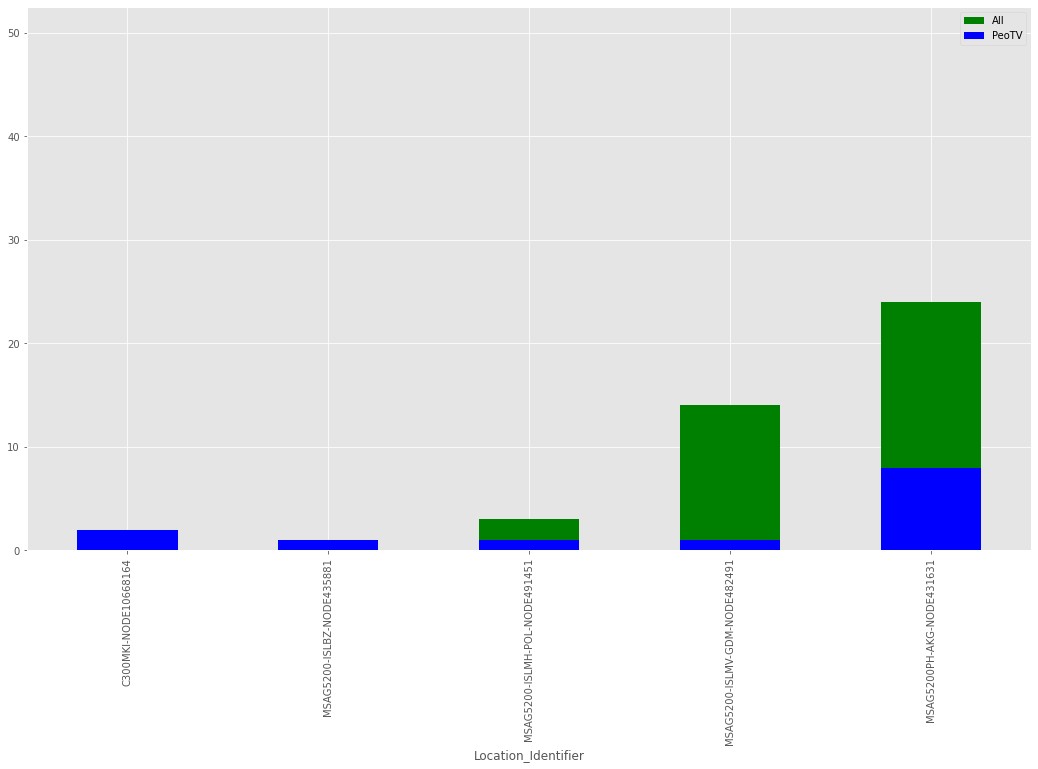

In [115]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_0_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [116]:
loc_precentage=(cluster_0_peo_loc/cluster_0_loc)*100

In [117]:
loc_precentage[(loc_precentage > 60)]

Series([], Name: event_source.hash, dtype: float64)

#### Feasible locations to offer Broadband

In [118]:
cluster_0_bb_loc = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY") | (cluster_0["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

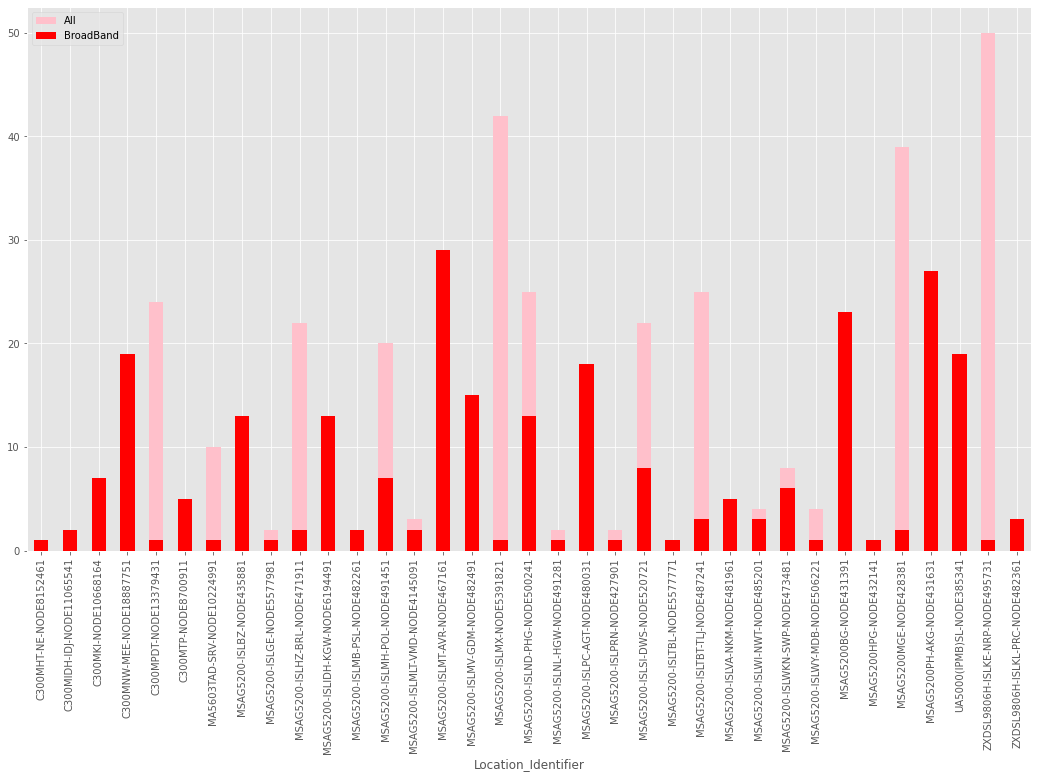

In [119]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_0_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [120]:
loc_precentage=(cluster_0_bb_loc/cluster_0_loc)*100

In [121]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461             100.000000
C300MIDH-IDJ-NODE11065541           66.666667
C300MNW-MEE-NODE18887751            79.166667
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     65.000000
MSAG5200-ISLMB-PSL-NODE482261       66.666667
MSAG5200-ISLMH-POL-NODE491451       77.777778
MSAG5200-ISLMT-AVR-NODE467161       69.047619
MSAG5200-ISLND-PHG-NODE500241      100.000000
MSAG5200-ISLPC-AGT-NODE480031       81.818182
MSAG5200-ISLPRN-NODE427901         100.000000
MSAG5200-ISLTBL-NODE5577771        100.000000
MSAG5200-ISLTBT-TLJ-NODE487241      75.000000
MSAG5200-ISLVA-NKM-NODE481961       62.500000
MSAG5200-ISLWI-NWT-NODE485201       75.000000
MSAG5200-ISLWKN-SWP-NODE473481      75.000000
MSAG5200-ISLWY-MDB-NODE506221      100.000000
ZXDSL9806H-ISLKE-NRP-NODE495731    100.000000
ZXDSL9806H-ISLKL-PRC-NODE482361     75.000000
Name: event_source.hash, dtype: float64

## Cluster 0- Findings